# FINAL TWITTER_DATASET TO TRAIN DATA

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
new_full_dataset = pd.read_csv('new_full_dataset.csv')
new_full_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1593262  Just woke up. Having no school is the best fee...   
1593263  TheWDB.com - Very cool to hear old Walt interv...   
1593264  Are you ready for your MoJo Makeover? Ask me f...   
1593265  Happy 38th Birthday to my boo of alll time!!! ...   
1593266  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1593262                         wake school best feel ever         56   
1593263  thewdbcom cool hear old walt interview httpbli...         81   
1593264                     ready mojo makeover ask detail         57   
1593265    happy  birthday boo all time tupac amaru shakur         65   
1593266                               happy charitytuesday         62   

         clean_len  
0             76.0  
1             45.0  
2             31.0  
3             24.0  
4             10.0  
...            ...  
1593262       26.0  
1593263       53.0  
1593264       30.0  
1593265       48.0  
1593266       20.0  

[1593267 rows x 4 columns]

## Visualizing Data

In [ ]:
new_full_dataset[new_full_dataset['clean_text'].isnull()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tweet clean_text  tweet_len  clean_len
279                @ITS_NEMESIS -------         NaN         21        2.0
1175            @almostcool i'm off now         NaN         24        1.0
1372            @zaibatsu ME...I'm up.          NaN         24        2.0
2459      @ClaireRichard6 All of em???          NaN         30        2.0
2460                 @duncn They won't.         NaN         19        5.0
...                                  ...        ...        ...        ...
1586469        @rigelishere How're you?         NaN         25        2.0
1586481      @gustavolvieira What's up?         NaN         27        1.0
1588759  @TimCAD You should've done it!         NaN         31        5.0
1588803       @catswhocode We're on it.         NaN         26        2.0
1590647  @drealoveslife me and you  xxxx        NaN         31        1.0

[1009 rows x 4 columns]

In [ ]:
new_full_dataset.dropna(subset=['clean_text'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


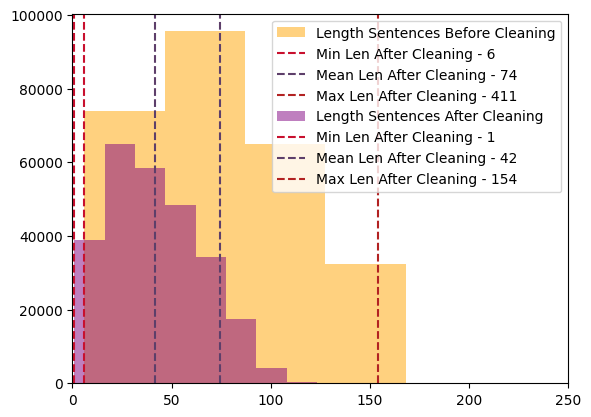

In [ ]:
#data before cleaning
plt.hist(new_full_dataset.tweet_len, label='Length Sentences Before Cleaning', alpha=0.5, color='orange')
plt.axvline(min(new_full_dataset.tweet_len), label=f'Min Len After Cleaning - {round(np.min(new_full_dataset.tweet_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(new_full_dataset.tweet_len), label=f'Mean Len After Cleaning - {round(np.mean(new_full_dataset.tweet_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(new_full_dataset.tweet_len), label=f'Max Len After Cleaning - {round(np.max(new_full_dataset.tweet_len))}', color='#B22222', linestyle='--')


#data after cleaning
plt.hist(new_full_dataset.clean_len, label='Length Sentences After Cleaning', alpha=0.5, color='purple')
plt.axvline(min(new_full_dataset.clean_len), label=f'Min Len After Cleaning - {round(np.min(new_full_dataset.clean_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(new_full_dataset.clean_len), label=f'Mean Len After Cleaning - {round(np.mean(new_full_dataset.clean_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(new_full_dataset.clean_len), label=f'Max Len After Cleaning - {round(np.max(new_full_dataset.clean_len))}', color='#B22222', linestyle='--')


plt.xlim(0, 250)
plt.legend()
plt.show();

## VIEW WORD COUNT

In [ ]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = new_full_dataset.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

full_tokenized_sentences

0         [upset, update, facebook, texting, might, cry,...
1         [dive, many, time, ball, manage, save, rest, g...
2                    [whole, body, feel, itchy, like, fire]
3                                        [behave, mad, see]
4                                             [whole, crew]
                                ...                        
267057     [accidentally, delete, important, picture, miss]
267058                                         [still, ill]
267059    [mourn, loss, birdsong, radio, httpnewsbbccouk...
267060                          [give, wrong, url, twitter]
267061                                 [wake, always, wake]
Name: clean_text, Length: 266897, dtype: object

In [ ]:
def cloud_string(tokenized_words, batch_size=100):

    comment_words = ''

    total_processed = 0

    for i in range(0, len(tokenized_words), batch_size):
        start = i
        end = min(i + batch_size, len(tokenized_words))
        batch_data = tokenized_words[start:end]

        comment_words += ' '.join(batch_data)+' '

        total_processed += len(batch_data)

        if total_processed >= 1_000_000:
            print(f"✅ Processed {total_processed} words")

    print("🥳 string with words completed.")
    return comment_words

In [ ]:
word_cloud_string = cloud_string(full_tokenized_words, batch_size=10000)

✅ Processed 1000000 words
✅ Processed 1010000 words
✅ Processed 1020000 words
✅ Processed 1030000 words
✅ Processed 1040000 words
✅ Processed 1050000 words
✅ Processed 1060000 words
✅ Processed 1070000 words
✅ Processed 1080000 words
✅ Processed 1090000 words
✅ Processed 1100000 words
✅ Processed 1110000 words
✅ Processed 1120000 words
✅ Processed 1130000 words
✅ Processed 1140000 words
✅ Processed 1150000 words
✅ Processed 1160000 words
✅ Processed 1170000 words
✅ Processed 1180000 words
✅ Processed 1190000 words
✅ Processed 1200000 words
✅ Processed 1210000 words
✅ Processed 1220000 words
✅ Processed 1230000 words
✅ Processed 1240000 words
✅ Processed 1250000 words
✅ Processed 1260000 words
✅ Processed 1270000 words
✅ Processed 1280000 words
✅ Processed 1290000 words
✅ Processed 1300000 words
✅ Processed 1310000 words
✅ Processed 1320000 words
✅ Processed 1330000 words
✅ Processed 1340000 words
✅ Processed 1350000 words
✅ Processed 1360000 words
✅ Processed 1370000 words
✅ Processed 

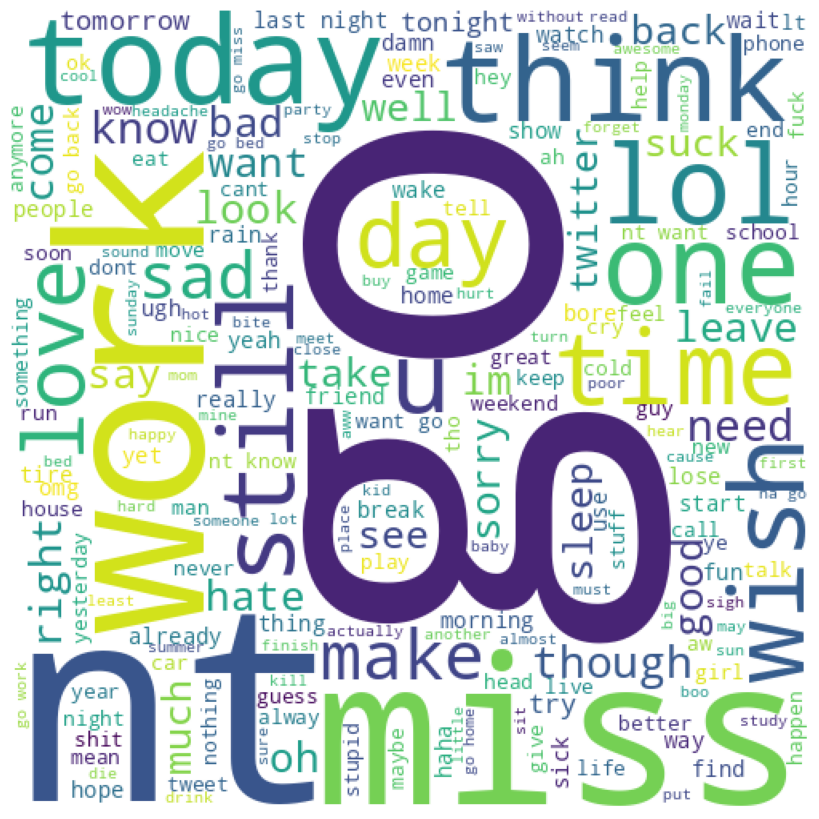

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(word_cloud_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
unique_word_count = Counter(full_tokenized_words)
unique_word_count

Counter({'upset': 931,
         'update': 1257,
         'facebook': 656,
         'texting': 108,
         'might': 1501,
         'cry': 2552,
         'result': 276,
         'school': 4996,
         'today': 12938,
         'also': 1608,
         'blah': 535,
         'dive': 56,
         'many': 1576,
         'time': 10829,
         'ball': 361,
         'manage': 321,
         'save': 671,
         'rest': 945,
         'go': 37144,
         'bound': 6,
         'whole': 1156,
         'body': 608,
         'feel': 12104,
         'itchy': 141,
         'like': 14165,
         'fire': 349,
         'behave': 32,
         'mad': 911,
         'see': 8656,
         'crew': 93,
         'need': 8749,
         'hug': 922,
         'hey': 1711,
         'long': 3394,
         'yes': 2029,
         'rain': 3517,
         'bite': 2159,
         'lol': 7668,
         'fine': 492,
         'thank': 2654,
         'nope': 531,
         'nt': 27212,
         'muera': 1,
         'spring': 

## TRY NEW MODELING

In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

# -qq  suppresses both standard output and standard error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 25.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [ ]:
#Dictionary Object from Gensim, which maps each word to their unique ID:
#full_tokenized_sentences - each sentence tokenized (turned into list)
dictionary = Dictionary(full_tokenized_sentences)
dictionary.token2id
len(dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21490

In [ ]:
#No_below: Tokens that appear in less than 200 documents are filtered out.
#No_above: Tokens that appear in more than 80% of the total corpus are also removed.
#Keep_n - limit number of tokens to most frequent, e.g. keep_n=5000

dictionary.filter_extremes(no_below=200, no_above=0.8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#The function doc2bow() simply counts the number of occurrences of each distinct word,
#converts the word to its integer word id and returns the result as a sparse vector
corpus = [dictionary.doc2bow(doc) for doc in full_tokenized_sentences]
corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1)],
 [(9, 1)],
 [],
 [(10, 1)],
 [(6, 1), (9, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1)],
 [],
 [(18, 1), (19, 1)],
 [],
 [(17, 1), (20, 1), (21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1)],
 [(17, 1), (26, 1), (27, 1), (28, 1), (29, 1)],
 [(22, 1), (30, 1), (31, 1), (32, 1)],
 [(22, 1), (33, 1)],
 [],
 [(9, 1), (34, 1), (35, 1), (36, 1)],
 [(37, 2), (38, 1), (39, 1)],
 [(17, 1), (30, 1), (40, 1), (41, 1)],
 [(3, 1), (6, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [],
 [(4, 1), (46, 1)],
 [(47, 1), (48, 1)],
 [(42, 1), (49, 1), (50, 1), (51, 1)],
 [(1, 1), (4, 1), (22, 1), (52, 1)],
 [(53, 1), (54, 1)],
 [(12, 1), (30, 1), (39, 1), (55, 1)],
 [(6, 1), (30, 1)],
 [(45, 1), (56, 1), (57, 1)],
 [(4, 2), (28, 1), (36, 1), (45, 1), (58, 2)],
 [(21, 1), (48, 1), (52, 1), (59, 1), (60, 1)],
 [(31, 1), (35, 1)],
 [(1, 1), (52, 1), (61, 1)],
 [(8, 1), (55, 1), (62, 1), (63, 1), (64, 1), (65, 2),

In [ ]:
#LdaMulticore, which uses all CPU cores to parallelize and speed up model training
#worders - number of laptop cores
#pass - the model will pass through the corpus ten times during training.

#train the model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=30, workers = 4, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/

KeyboardInterrupt: 

## CALCULATE  COHERENCE SCORE USING C_v


In [ ]:
!pip install optuna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.0 MB/s eta 0:00:00


In [ ]:
import optuna

trial_results = []

def objective(trial):
    num_topics = trial.suggest_int('num_topics', 2, 10)

    lda_model = LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=10,
        random_state=100
    )

    cm = CoherenceModel(
        model=lda_model,
        texts=full_tokenized_sentences,
        corpus=corpus,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = cm.get_coherence()

    # Log the results for each trial
    trial_results.append({
        'num_topics': num_topics,
        'coherence_score': coherence_score
    })

    return coherence_score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best number of topics:", best_params['num_topics'])
print("Best coherence score:", best_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[I 2024-07-20 12:20:16,761] A new study created in memory with name: no-name-851cf30a-3203-4bf3-bd7f-07e195668348
[I 2024-07-20 12:21:05,427] Trial 0 finished with value: 0.35658618257502905 and parameters: {'num_topics': 4}. Best is trial 0 with value: 0.35658618257502905.
[I 2024-07-20 12:21:53,041] Trial 1 finished with value: 0.32078131586523045 and parameters: {'num_topics': 2}. Best is trial 0 with value: 0.35658618257502905.
[I 2024-07-20 12:22:40,599] Trial 2 finished with value: 0.32078131586523045 and parameters: {'num_topics': 2}. Best is trial 0 with value: 0.35658618257502905.
[I 2024-07-20 12:23:28,061] Trial 3 finished wit

Best number of topics: 4
Best coherence score: 0.35658618257502916


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[I 2024-07-20 14:11:31,925] A new study created in memory with name: no-name-d5a6458f-8fb3-4649-88bd-84220fce7dfe
[I 2024-07-20 14:12:11,375] Trial 0 finished with value: 0.28532339852583116 and parameters: {'num_topics': 11}. Best is trial 0 with value: 0.28532339852583116.
[I 2024-07-20 14:12:43,492] Trial 1 finished with value: 0.29954654606987197 and parameters: {'num_topics': 39}. Best is trial 1 with value: 0.29954654606987197.
[I 2024-07-20 14:13:15,475] Trial 2 finished with value: 0.31162256971680063 and parameters: {'num_topics': 47}. Best is trial 2 with value: 0.31162256971680063.
[I 2024-07-20 14:13:47,588] Trial 3 finished 

Best number of topics: 53
Best coherence score: 0.33027725533998686


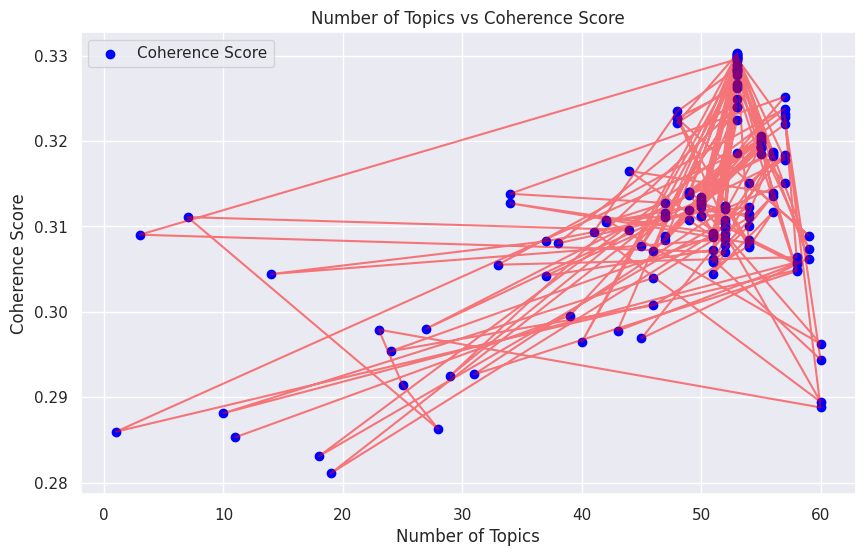

In [ ]:
import optuna
import matplotlib.pyplot as plt
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

# List to store trial results
trial_results = []

def objective(trial):
    num_topics = trial.suggest_int('num_topics', 1, 60)

    lda_model = LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=10,
        random_state=100,
        workers=4
    )

    cm = CoherenceModel(
        model=lda_model,
        texts=full_tokenized_sentences,
        corpus=corpus,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = cm.get_coherence()

    # Log the results for each trial
    trial_results.append({
        'num_topics': num_topics,
        'coherence_score': coherence_score
    })

    return coherence_score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

# Get the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best number of topics:", best_params['num_topics'])
print("Best coherence score:", best_score)

# Convert trial results to lists for plotting
num_topics_list = [result['num_topics'] for result in trial_results]
coherence_scores_list = [result['coherence_score'] for result in trial_results]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(num_topics_list, coherence_scores_list, c='blue', label='Coherence Score')
plt.plot(num_topics_list, coherence_scores_list, c='red', alpha=0.5)  # Optional line plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Number of Topics vs Coherence Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Unigrams only - corpus = [dictionary.doc2bow(doc) for doc in full_tokenized_sentences]
# dictionary - dictionary = Dictionary(full_tokenized_sentences)
#dictionary.filter_extremes(no_below=200, no_above=0.8) - removing words that appear less than 200 times and more than 80%
#Keep_n - limit number of tokens to most frequent, e.g. keep_n=5000 - no keep_n (to include in next iteration)
#lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=100, workers=4)
#150 number of trials


scores_topics_first = pd.DataFrame.from_dict(
                                            {
                                                'topics': num_topics_list,
                                                'scores': coherence_scores_list,
                                            })

scores_topics_first

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topics    scores
0        11  0.285323
1        39  0.299547
2        47  0.311623
3        53  0.323973
4        29  0.292537
..      ...       ...
145      55  0.319352
146      50  0.313014
147      57  0.317839
148      53  0.329891
149      52  0.309848

[150 rows x 2 columns]

In [ ]:
"""file_path = 'scores_topics_first.csv'
scores_topics_first.to_csv(file_path, index=False, encoding='utf-8')"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scores_topics_first = pd.read_csv('../raw_data/scores_topics_first.csv')

In [ ]:
filtered_data = scores_topics_first.groupby('topics')['scores'].max().reset_index()

filtered_data.columns = ['topics', 'scores']

In [ ]:
filtered_data

topics    scores
0        1  0.285977
1        3  0.309037
2        7  0.311094
3       10  0.288145
4       11  0.285323
5       14  0.304430
6       18  0.283103
7       19  0.281112
8       23  0.297924
9       24  0.295392
10      25  0.291461
11      27  0.298042
12      28  0.286267
13      29  0.292537
14      31  0.292679
15      33  0.305524
16      34  0.313827
17      37  0.308263
18      38  0.308018
19      39  0.299547
20      40  0.296437
21      41  0.309356
22      42  0.310774
23      43  0.297787
24      44  0.316490
25      45  0.307704
26      46  0.307102
27      47  0.312757
28      48  0.323463
29      49  0.314087
30      50  0.313427
31      51  0.309252
32      52  0.312374
33      53  0.330277
34      54  0.315112
35      55  0.320576
36      56  0.318750
37      57  0.325182
38      58  0.306406
39      59  0.308940
40      60  0.296267

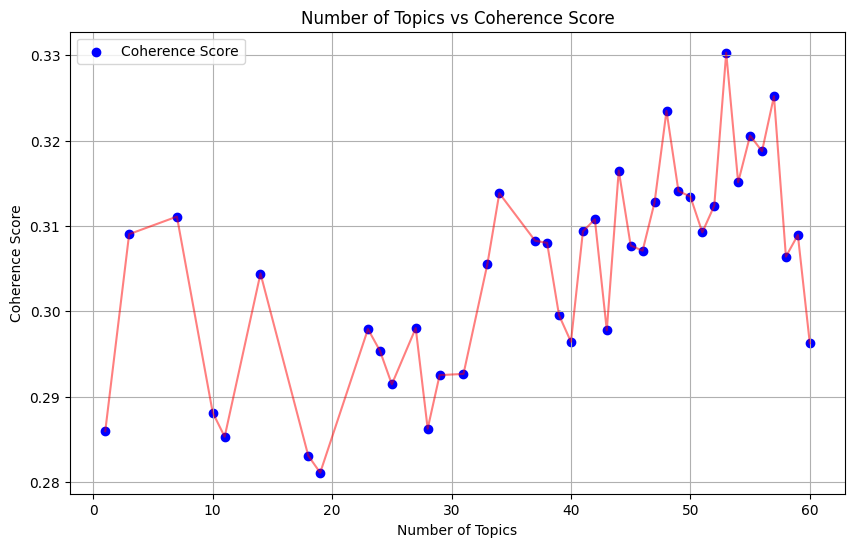

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['topics'], filtered_data['scores'], c='blue', label='Coherence Score')
plt.plot(filtered_data['topics'], filtered_data['scores'], c='red', alpha=0.5)  # Optional line plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Number of Topics vs Coherence Score')
plt.legend()
plt.grid(True)
plt.show();

# Include Bigrams in the Model and Change Vectorizer Params

In [ ]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = new_full_dataset.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

full_tokenized_sentences

#every sentence in the corpus will be turned into a list of words

0          [upset, update, facebook, texting, might, cry,...
1          [dive, many, time, ball, manage, save, rest, g...
2                     [whole, body, feel, itchy, like, fire]
3                                         [behave, mad, see]
4                                              [whole, crew]
                                 ...                        
1593262                     [wake, school, best, feel, ever]
1593263    [thewdbcom, cool, hear, old, walt, interview, ...
1593264                 [ready, mojo, makeover, ask, detail]
1593265    [happy, birthday, boo, all, time, tupac, amaru...
1593266                              [happy, charitytuesday]
Name: clean_text, Length: 1592258, dtype: object

# VIEW UNIQUE WORDS PREVALENCE

In [ ]:
#unique words counter - meaning a dictionary with all the unique words and how many times they are in the corpus
unique_word_count = Counter(full_tokenized_words)
unique_word_count

Counter({'go': 188838,
         'get': 182684,
         'nt': 119048,
         'day': 106653,
         'good': 91060,
         'work': 87568,
         'like': 82851,
         'love': 77243,
         'u': 70119,
         'today': 68656,
         'time': 65930,
         'think': 62264,
         'know': 61678,
         'lol': 59146,
         'thank': 58717,
         'want': 58069,
         'back': 57326,
         'see': 57202,
         'one': 56800,
         'miss': 56793,
         'make': 56643,
         'feel': 51168,
         'im': 50459,
         'really': 50260,
         'come': 45087,
         'night': 44918,
         'still': 43548,
         'watch': 43471,
         'need': 43318,
         'oh': 43312,
         'well': 42682,
         'new': 42346,
         'home': 40677,
         'look': 39592,
         'much': 37085,
         'last': 35998,
         'say': 35125,
         'tomorrow': 35023,
         'morning': 34951,
         'twitter': 34873,
         'sleep': 34783,
         'w

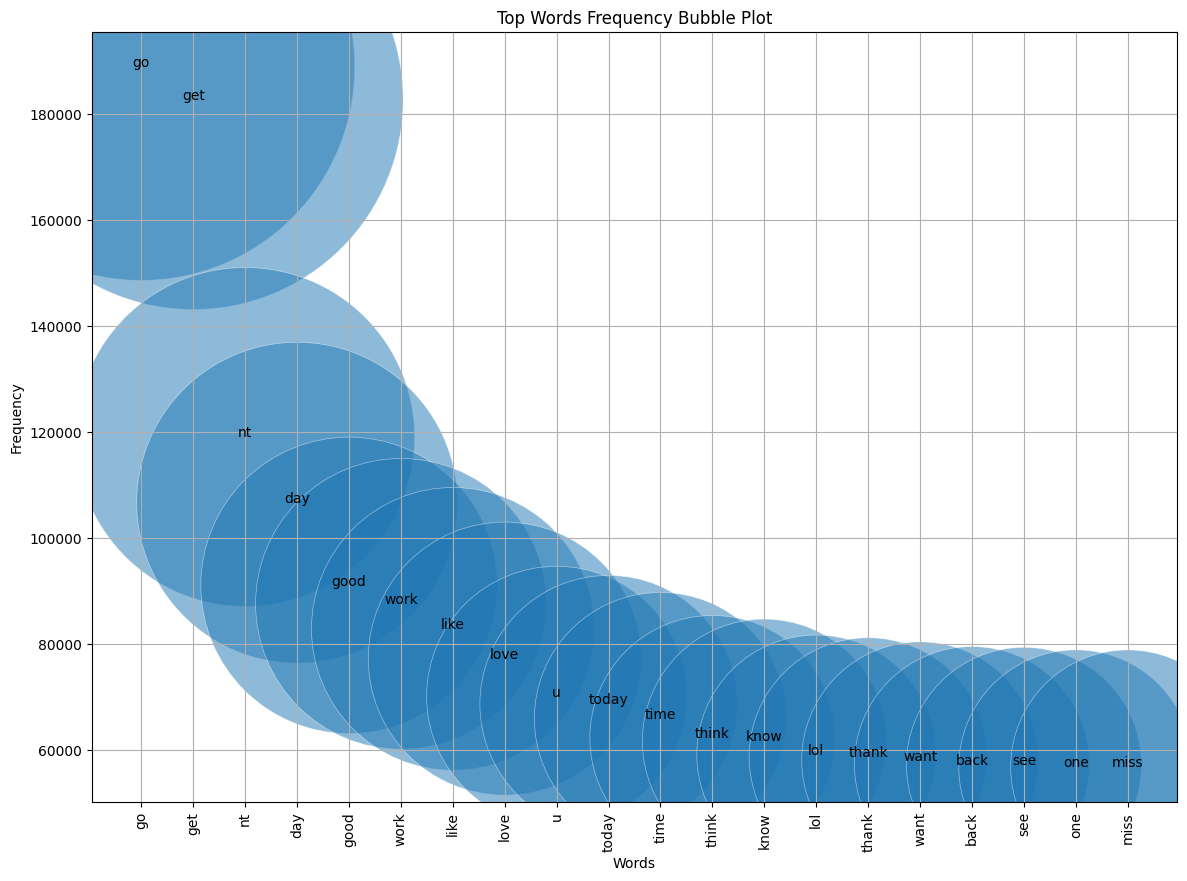

In [ ]:
unique_word_count_df = pd.DataFrame(unique_word_count.items(), columns=['word', 'count'])

top_n = 20
top_unique_word_count_df = unique_word_count_df.nlargest(top_n, 'count')

plt.figure(figsize=(14, 10))

plt.scatter(
    top_unique_word_count_df['word'],
    top_unique_word_count_df['count'],
    s=top_unique_word_count_df['count']/2,  # Size of the bubble
    alpha=0.5,
    edgecolors="w",
    linewidth=0.5
)

for i in range(top_n):
    plt.text(
        top_unique_word_count_df['word'].iloc[i],
        top_unique_word_count_df['count'].iloc[i],
        top_unique_word_count_df['word'].iloc[i],
        fontsize=10,
        ha='center'
    )

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words Frequency Bubble Plot')
plt.xticks(rotation=90)
plt.grid(True)
plt.show();

In [ ]:
#every unique word gets assigned a unique ID
dictionary = Dictionary(full_tokenized_sentences)
dictionary.token2id

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'also': 0,
 'blah': 1,
 'cry': 2,
 'facebook': 3,
 'might': 4,
 'result': 5,
 'school': 6,
 'texting': 7,
 'today': 8,
 'update': 9,
 'upset': 10,
 'ball': 11,
 'bound': 12,
 'dive': 13,
 'go': 14,
 'manage': 15,
 'many': 16,
 'rest': 17,
 'save': 18,
 'time': 19,
 'body': 20,
 'feel': 21,
 'fire': 22,
 'itchy': 23,
 'like': 24,
 'whole': 25,
 'behave': 26,
 'mad': 27,
 'see': 28,
 'crew': 29,
 'hug': 30,
 'need': 31,
 'bite': 32,
 'fine': 33,
 'hey': 34,
 'lol': 35,
 'long': 36,
 'rain': 37,
 'thank': 38,
 'yes': 39,
 'nope': 40,
 'nt': 41,
 'muera': 42,
 'break': 43,
 'city': 44,
 'plain': 45,
 'snow': 46,
 'spring': 47,
 'ear': 48,
 'repierced': 49,
 'bear': 50,
 'could': 51,
 'embarrass': 52,
 'loss': 53,
 'think': 54,
 'watch': 55,
 'anymore': 56,
 'count': 57,
 'either': 58,
 'know': 59,
 'never': 60,
 'talk': 61,
 'doucheclown': 62,
 'first': 63,
 'gun': 64,
 'really': 65,
 'snyder': 66,
 'though': 67,
 'would': 68,
 'zac': 69,
 'get': 70,
 'miss': 71,
 'premiere': 72,
 'wish':

In [ ]:
#No_below: Tokens that appear in less than 20 documents are filtered out.
#No_above: Tokens that appear in more than 80% of the total corpus are also removed.
#Keep_n - limit number of tokens to most frequent, e.g. keep_n=5000

dictionary.filter_extremes(no_below=20, no_above=20_000, keep_n=7000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# NOW INCLUDE BIGRAMS
#param - threshold=10 makes the model conservative, we only include bigrams that are more like for words to appear together than separately

#tokenize sentences into unigrams
full_tokenized_sentences = new_full_dataset.clean_text.apply(lambda x: x.split())

#create bigrams
from gensim.models import Phrases

bigram_model = Phrases(full_tokenized_sentences, min_count=20, threshold=10)

# Apply the bigram model to the tokenized sentences
bigram_sentences = [bigram_model[sentence] for sentence in full_tokenized_sentences]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.corpora import Dictionary

dictionary = Dictionary(bigram_sentences)

dictionary.filter_extremes(no_below=100, no_above=20_000, keep_n=7000)

dictionary.token2id

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'also': 0,
 'blah': 1,
 'cry': 2,
 'facebook': 3,
 'might': 4,
 'result': 5,
 'school': 6,
 'texting': 7,
 'today': 8,
 'update': 9,
 'upset': 10,
 'ball': 11,
 'go': 12,
 'manage': 13,
 'many': 14,
 'rest': 15,
 'save': 16,
 'time': 17,
 'feel': 18,
 'fire': 19,
 'itchy': 20,
 'like': 21,
 'mad': 22,
 'see': 23,
 'crew': 24,
 'whole': 25,
 'need_hug': 26,
 'bite': 27,
 'fine': 28,
 'hey': 29,
 'lol': 30,
 'long': 31,
 'rain': 32,
 'thank': 33,
 'yes': 34,
 'nope': 35,
 'nt': 36,
 'city': 37,
 'snow': 38,
 'spring_break': 39,
 'ear': 40,
 'bear': 41,
 'could': 42,
 'loss': 43,
 'think': 44,
 'watch': 45,
 'anymore': 46,
 'count': 47,
 'either': 48,
 'know': 49,
 'never': 50,
 'talk': 51,
 'first': 52,
 'really': 53,
 'though': 54,
 'would': 55,
 'get': 56,
 'miss': 57,
 'wish': 58,
 'cut': 59,
 'death': 60,
 'film': 61,
 'hurt': 62,
 'scene': 63,
 'file': 64,
 'tax': 65,
 'ahh': 66,
 'always': 67,
 'ive': 68,
 'love': 69,
 'rent': 70,
 'want': 71,
 'drink': 72,
 'forget': 73,
 'oh_dea

In [ ]:
corpus = [dictionary.doc2bow(sentence) for sentence in bigram_sentences]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# TRY NEW METHOD TO GET COHERENCE SCORE

In [ ]:
new_full_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1593262  Just woke up. Having no school is the best fee...   
1593263  TheWDB.com - Very cool to hear old Walt interv...   
1593264  Are you ready for your MoJo Makeover? Ask me f...   
1593265  Happy 38th Birthday to my boo of alll time!!! ...   
1593266  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1593262                         wake school best feel ever         56   
1593263  thewdbcom cool hear old walt interview httpbli...         81   
1593264                     ready mojo makeover ask detail         57   
1593265    happy  birthday boo all time tupac amaru shakur         65   
1593266                               happy charitytuesday         62   

         clean_len  
0             76.0  
1             45.0  
2             31.0  
3             24.0  
4             10.0  
...            ...  
1593262       26.0  
1593263       53.0  
1593264       30.0  
1593265       48.0  
1593266       20.0  

[1593267 rows x 4 columns]

In [ ]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = new_full_dataset.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

full_tokenized_sentences


#unique words counter - meaning a dictionary with all the unique words and how many times they are in the corpus
unique_word_count = Counter(full_tokenized_words)
unique_word_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Counter({'upset': 3024,
         'update': 9178,
         'facebook': 4355,
         'texting': 752,
         'might': 9760,
         'cry': 8691,
         'result': 1689,
         'school': 20888,
         'today': 68656,
         'also': 10426,
         'blah': 1937,
         'dive': 332,
         'many': 8877,
         'time': 65930,
         'ball': 1993,
         'manage': 1667,
         'save': 3760,
         'rest': 5840,
         'go': 188838,
         'bound': 22,
         'whole': 6004,
         'body': 2720,
         'feel': 51168,
         'itchy': 462,
         'like': 82851,
         'fire': 1976,
         'behave': 231,
         'mad': 3938,
         'see': 57202,
         'crew': 687,
         'need': 43318,
         'hug': 5257,
         'hey': 19935,
         'long': 17929,
         'yes': 20103,
         'rain': 17116,
         'bite': 12411,
         'lol': 59146,
         'fine': 4615,
         'thank': 58717,
         'nope': 2723,
         'nt': 119048,
         

In [ ]:
# Plot unique words

word_frequency = pd.DataFrame(
                            {
                                'Words': unique_word_count.keys(),
                                'Count': unique_word_count.values(),})

word_frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Words  Count
0                    upset   3024
1                   update   9178
2                 facebook   4355
3                  texting    752
4                    might   9760
...                    ...    ...
314172  httptinyurlcommjan      1
314173  httptinyurlcomnxjt      1
314174              bigrun      1
314175           thewdbcom      1
314176      httpblipfmbmta      1

[314177 rows x 2 columns]

# **SECTION** ***2***

# Additional Cleaning

In [35]:
complete_twitter_cleaned = pd.read_csv('complete_twitter_cleaned.csv')

In [36]:
complete_twitter_cleaned

Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1592056  Just woke up. Having no school is the best fee...   
1592057  TheWDB.com - Very cool to hear old Walt interv...   
1592058  Are you ready for your MoJo Makeover? Ask me f...   
1592059  Happy 38th Birthday to my boo of alll time!!! ...   
1592060  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1592056                         wake school best feel ever         56   
1592057  thewdbcom cool hear old walt interview httpbli...         81   
1592058                     ready mojo makeover ask detail         57   
1592059    happy  birthday boo all time tupac amaru shakur         65   
1592060                               happy charitytuesday         62   

         clean_len  
0             76.0  
1             45.0  
2             31.0  
3             24.0  
4             10.0  
...            ...  
1592056       26.0  
1592057       53.0  
1592058       30.0  
1592059       48.0  
1592060       20.0  

[1592061 rows x 4 columns]

In [37]:
complete_twitter_cleaned.isnull().sum()

Tweet         0
clean_text    0
tweet_len     0
clean_len     0
dtype: int64

In [38]:
complete_twitter_cleaned[complete_twitter_cleaned['clean_text'].isnull()]

Empty DataFrame
Columns: [Tweet, clean_text, tweet_len, clean_len]
Index: []

In [ ]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = complete_twitter_cleaned.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

full_tokenized_sentences


#unique words counter - meaning a dictionary with all the unique words and how many times they are in the corpus
unique_word_count = Counter(full_tokenized_words)
unique_word_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Counter({'upset': 3024,
         'update': 9178,
         'facebook': 4355,
         'texting': 752,
         'might': 9760,
         'cry': 8691,
         'result': 1689,
         'school': 20888,
         'today': 68656,
         'also': 10426,
         'blah': 1937,
         'dive': 332,
         'many': 8877,
         'time': 65930,
         'ball': 1993,
         'manage': 1667,
         'save': 3760,
         'rest': 5840,
         'go': 188838,
         'bound': 22,
         'whole': 6004,
         'body': 2720,
         'feel': 51168,
         'itchy': 462,
         'like': 82851,
         'fire': 1976,
         'behave': 231,
         'mad': 3938,
         'see': 57202,
         'crew': 687,
         'need': 43318,
         'hug': 5257,
         'hey': 19935,
         'long': 17929,
         'yes': 20103,
         'rain': 17116,
         'bite': 12411,
         'lol': 59146,
         'fine': 4615,
         'thank': 58717,
         'nope': 2723,
         'muera': 1,
         's

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: DeprecationWarning:

Conversion of

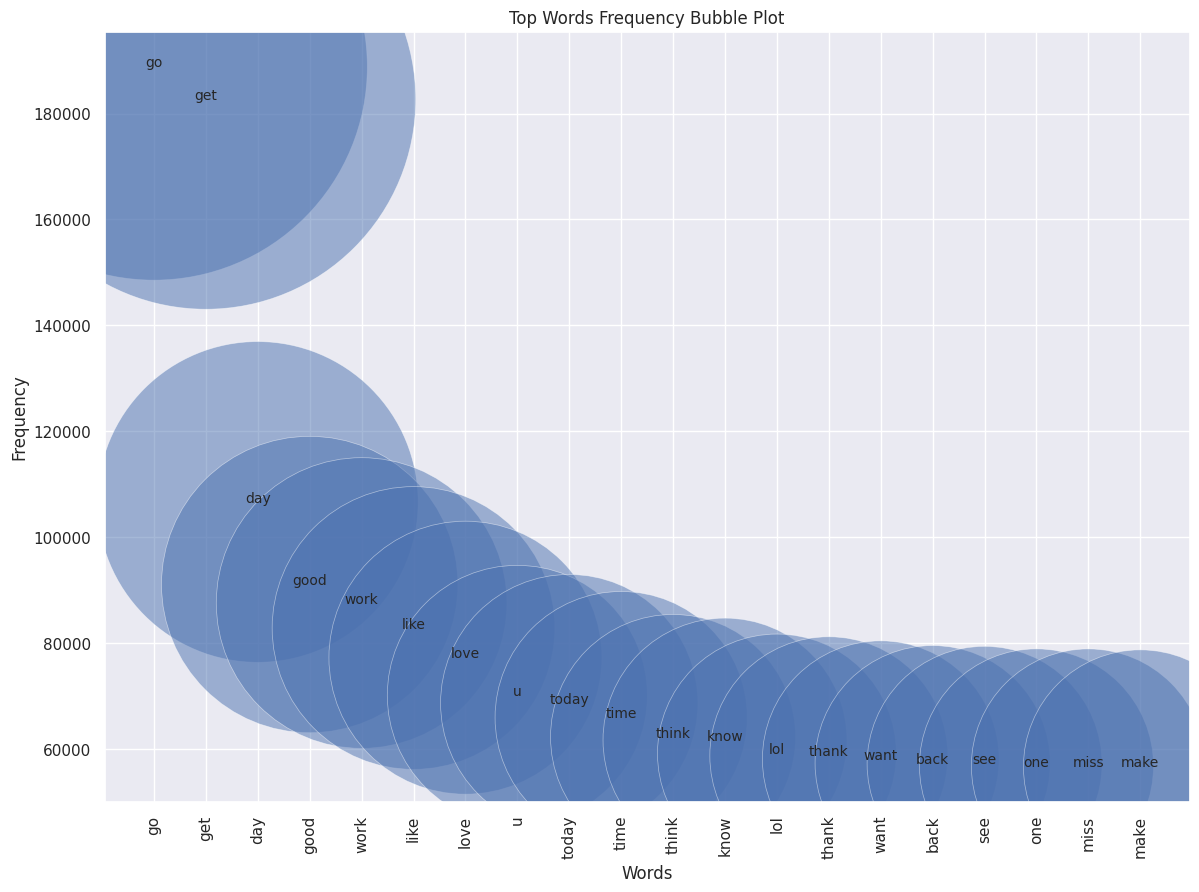

In [ ]:
unique_word_count_df = pd.DataFrame(unique_word_count.items(), columns=['word', 'count'])

top_n = 20
top_unique_word_count_df = unique_word_count_df.nlargest(top_n, 'count')

plt.figure(figsize=(14, 10))

plt.scatter(
    top_unique_word_count_df['word'],
    top_unique_word_count_df['count'],
    s=top_unique_word_count_df['count']/2,  # Size of the bubble
    alpha=0.5,
    edgecolors="w",
    linewidth=0.5
)

for i in range(top_n):
    plt.text(
        top_unique_word_count_df['word'].iloc[i],
        top_unique_word_count_df['count'].iloc[i],
        top_unique_word_count_df['word'].iloc[i],
        fontsize=10,
        ha='center'
    )

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words Frequency Bubble Plot')
plt.xticks(rotation=90)
plt.grid(True)
plt.show();

In [ ]:
frequencies = list(unique_word_count.values())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
len(frequencies)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



314176

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(0.0, 60500.0)

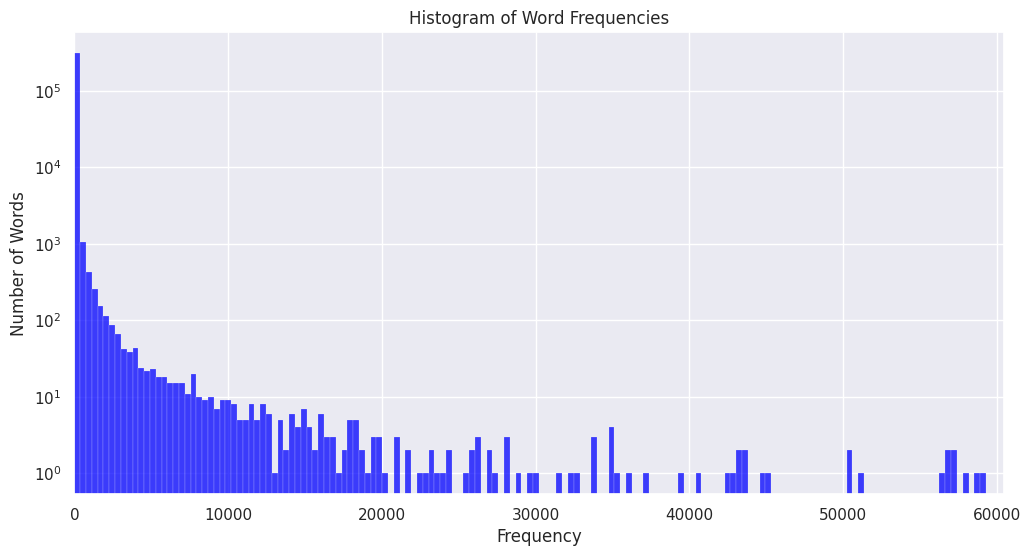

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(frequencies, bins=500, kde=False, color='blue')

plt.title('Histogram of Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.yscale('log')

plt.xlim((0, 60_500))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=frequencies,
    nbinsx=1500,
    marker=dict(
        color='blue',
        line=dict(
            width=1,
            color='black'
        )
    ),
    hoverinfo='skip'
))

#y_tickvals = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
#y_ticktext = ['1', '2', '5', '10', '20', '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']

# Update layout for better visualization
fig.update_layout(
    title='Histogram of Word Frequencies',
    xaxis_title='Frequency',
    yaxis_title='Number of Words',
    yaxis_type='log',
    xaxis=dict(range=[0, 100_000]),
    #yaxis=dict(
        #tickvals=y_tickvals,
        #ticktext=y_ticktext
    )
#)

# Add hover text to show bin ranges and counts
fig.update_traces(
    hovertemplate='Bin Range: %{x}<br>Count: %{y}<extra></extra>'
)

# Show the plot
fig.show()

#one bin at the y mark of 1000, has a range of 500-999 and count of 887
#so this means that 887 words in the frequency show up in the full corpus in a range from 500-999 times

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TRY UNIGRAMS ONLY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



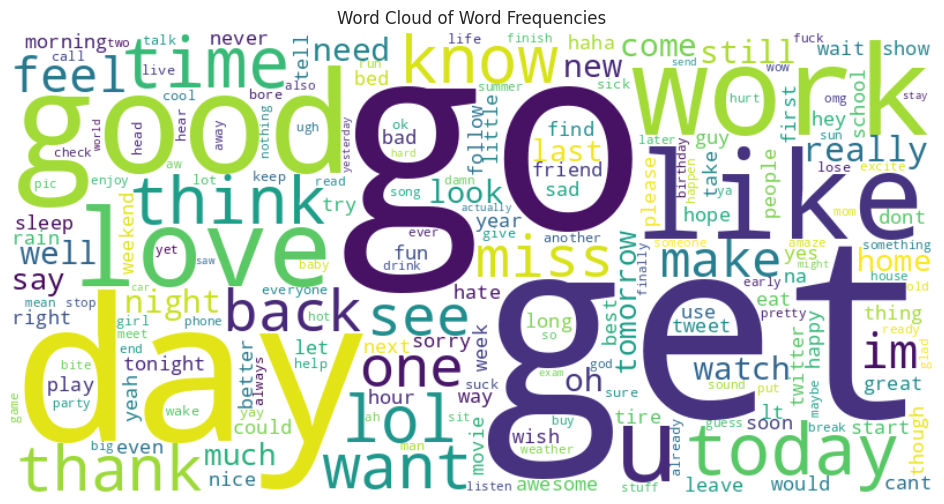

In [ ]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_word_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word Frequencies')
plt.show()

In [ ]:
#Dictionary Object from Gensim, which maps each word to their unique ID:
#full_tokenized_sentences - each sentence tokenized (turned into list)
unigram_dictionary = Dictionary(full_tokenized_sentences)
unigram_dictionary.filter_extremes(no_below=600, no_above=25_000)
unigram_dictionary.token2id

#LOGIC
#over  310k words appear from 0-199 times in the full corpus so very infrequent and could reduce noise by removing them
#65_000 because we only have one word that appears in that range, could also reduce noise by reducing the number of most frequent words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'also': 0,
 'blah': 1,
 'cry': 2,
 'facebook': 3,
 'might': 4,
 'result': 5,
 'school': 6,
 'texting': 7,
 'today': 8,
 'update': 9,
 'upset': 10,
 'ball': 11,
 'go': 12,
 'manage': 13,
 'many': 14,
 'rest': 15,
 'save': 16,
 'time': 17,
 'body': 18,
 'feel': 19,
 'fire': 20,
 'like': 21,
 'whole': 22,
 'mad': 23,
 'see': 24,
 'crew': 25,
 'hug': 26,
 'need': 27,
 'bite': 28,
 'fine': 29,
 'hey': 30,
 'lol': 31,
 'long': 32,
 'rain': 33,
 'thank': 34,
 'yes': 35,
 'nope': 36,
 'break': 37,
 'city': 38,
 'snow': 39,
 'spring': 40,
 'ear': 41,
 'bear': 42,
 'could': 43,
 'loss': 44,
 'think': 45,
 'watch': 46,
 'anymore': 47,
 'count': 48,
 'either': 49,
 'know': 50,
 'never': 51,
 'talk': 52,
 'first': 53,
 'really': 54,
 'though': 55,
 'would': 56,
 'get': 57,
 'miss': 58,
 'wish': 59,
 'cut': 60,
 'death': 61,
 'film': 62,
 'hurt': 63,
 'scene': 64,
 'file': 65,
 'ahh': 66,
 'always': 67,
 'ive': 68,
 'love': 69,
 'rent': 70,
 'want': 71,
 'dear': 72,
 'drink': 73,
 'forget': 74,
 'o

CHECK UPDATED FREQUENCIES

In [ ]:
filtered_corpus = [unigram_dictionary.doc2bow(doc) for doc in full_tokenized_sentences]
filtered_word_count = Counter()
for doc in filtered_corpus:
    for _, freq in doc:
        filtered_word_count.update([_])

filtered_frequencies = list(filtered_word_count.values())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=filtered_frequencies,
    nbinsx=1500,
    marker=dict(
        color='blue',
        line=dict(
            width=1,
            color='black'
        )
    ),
    hoverinfo='skip'
))

#y_tickvals = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
#y_ticktext = ['1', '2', '5', '10', '20', '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']

# Update layout for better visualization
fig.update_layout(
    title='Histogram of Word Frequencies',
    xaxis_title='Frequency',
    yaxis_title='Number of Words',
    yaxis_type='log',
    xaxis=dict(range=[0, 100_000]),
    #yaxis=dict(
        #tickvals=y_tickvals,
        #ticktext=y_ticktext
    )
#)

# Add hover text to show bin ranges and counts
fig.update_traces(
    hovertemplate='Bin Range: %{x}<br>Count: %{y}<extra></extra>'
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CHECK WORDCLOUD FOR FILTERED

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



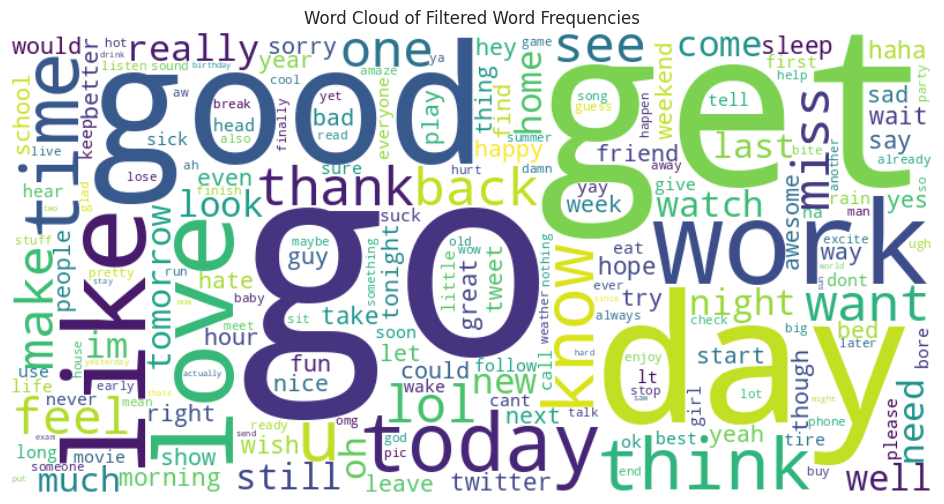

In [ ]:
id_to_word = {id_: _ for _, id_ in unigram_dictionary.token2id.items()}
word_frequencies = {id_to_word[id_]: freq for id_, freq in filtered_word_count.items() if id_ in id_to_word}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Word Frequencies')
plt.show()


# REMOVE ROWS WITH SENTENCES WITH LEN INFERIOR TO 2

LDA MODEL WITH THESE PARAMS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



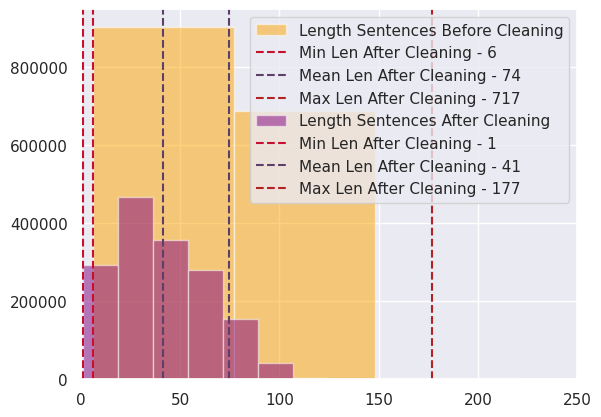

In [ ]:
#data before cleaning
plt.hist(complete_twitter_cleaned.tweet_len, label='Length Sentences Before Cleaning', alpha=0.5, color='orange')
plt.axvline(min(complete_twitter_cleaned.tweet_len), label=f'Min Len After Cleaning - {round(np.min(complete_twitter_cleaned.tweet_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(complete_twitter_cleaned.tweet_len), label=f'Mean Len After Cleaning - {round(np.mean(complete_twitter_cleaned.tweet_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(complete_twitter_cleaned.tweet_len), label=f'Max Len After Cleaning - {round(np.max(complete_twitter_cleaned.tweet_len))}', color='#B22222', linestyle='--')


#data after cleaning
plt.hist(complete_twitter_cleaned.clean_len, label='Length Sentences After Cleaning', alpha=0.5, color='purple')
plt.axvline(min(complete_twitter_cleaned.clean_len), label=f'Min Len After Cleaning - {round(np.min(complete_twitter_cleaned.clean_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(complete_twitter_cleaned.clean_len), label=f'Mean Len After Cleaning - {round(np.mean(complete_twitter_cleaned.clean_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(complete_twitter_cleaned.clean_len), label=f'Max Len After Cleaning - {round(np.max(complete_twitter_cleaned.clean_len))}', color='#B22222', linestyle='--')


plt.xlim(0, 250)
plt.legend()
plt.show();

In [39]:
complete_twitter_cleaned['word_count_cleaned'] = complete_twitter_cleaned['clean_text'].apply(lambda x: len(x.split()))

In [40]:
complete_twitter_cleaned[complete_twitter_cleaned['word_count_cleaned'] < 2]

Tweet clean_text  tweet_len  \
7        @Tatiana_K nope they didn't have it       nope          36   
8                   @twittera que me muera ?       muera         25   
82                @markhardy1974 Me too  #itm        itm         27   
107              @Henkuyinepu it's overrated    overrate         28   
127                              I'm so cold        cold         12   
...                                       ...        ...        ...   
1591992              @AndrewDearling *yawns*        yawn         24   
1592011            finding out what this is.        find         26   
1592025              @OHTristaN it's sunoudy     sunoudy         24   
1592040             @shebbs123 i second that      second         25   
1592041                        In the garden      garden         14   

         clean_len  word_count_cleaned  
7              7.0                   1  
8              9.0                   1  
82             3.0                   1  
107           10.0                   1  
127            6.0                   1  
...            ...                 ...  
1591992        4.0                   1  
1592011        4.0                   1  
1592025        9.0                   1  
1592040        6.0                   1  
1592041        6.0                   1  

[55630 rows x 5 columns]

In [41]:
complete_twitter_cleaned = complete_twitter_cleaned[complete_twitter_cleaned['word_count_cleaned'] >= 2]

## CHECK WORD DISTRUBUTION

In [ ]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = complete_twitter_cleaned.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

full_tokenized_sentences


#unique words counter - meaning a dictionary with all the unique words and how many times they are in the corpus
unique_word_count = Counter(full_tokenized_words)
unique_word_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Counter({'upset': 2979,
         'update': 9093,
         'facebook': 4323,
         'texting': 736,
         'might': 9753,
         'cry': 8617,
         'result': 1687,
         'school': 20841,
         'today': 68569,
         'also': 10412,
         'blah': 1932,
         'dive': 331,
         'many': 8868,
         'time': 65823,
         'ball': 1988,
         'manage': 1664,
         'save': 3746,
         'rest': 5831,
         'go': 188477,
         'bound': 22,
         'whole': 6004,
         'body': 2720,
         'feel': 51091,
         'itchy': 458,
         'like': 82616,
         'fire': 1965,
         'behave': 231,
         'mad': 3903,
         'see': 56991,
         'crew': 686,
         'need': 43255,
         'hug': 5132,
         'hey': 19372,
         'long': 17905,
         'yes': 19499,
         'rain': 16739,
         'bite': 12399,
         'lol': 58843,
         'fine': 4555,
         'thank': 54645,
         'spring': 1218,
         'break': 13535,
     

In [ ]:
frequencies = list(unique_word_count.values())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=frequencies,
    nbinsx=1500,
    marker=dict(
        color='blue',
        line=dict(
            width=1,
            color='black'
        )
    ),
    hoverinfo='skip'
))

#y_tickvals = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
#y_ticktext = ['1', '2', '5', '10', '20', '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']

# Update layout for better visualization
fig.update_layout(
    title='Histogram of Word Frequencies',
    xaxis_title='Frequency',
    yaxis_title='Number of Words',
    yaxis_type='log',
    xaxis=dict(range=[0, 100_000]),
    #yaxis=dict(
        #tickvals=y_tickvals,
        #ticktext=y_ticktext
    )
#)

# Add hover text to show bin ranges and counts
fig.update_traces(
    hovertemplate='Bin Range: %{x}<br>Count: %{y}<extra></extra>'
)

# Show the plot
fig.show()

#one bin at the y mark of 1000, has a range of 500-999 and count of 887
#so this means that 887 words in the frequency show up in the full corpus in a range from 500-999 times

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



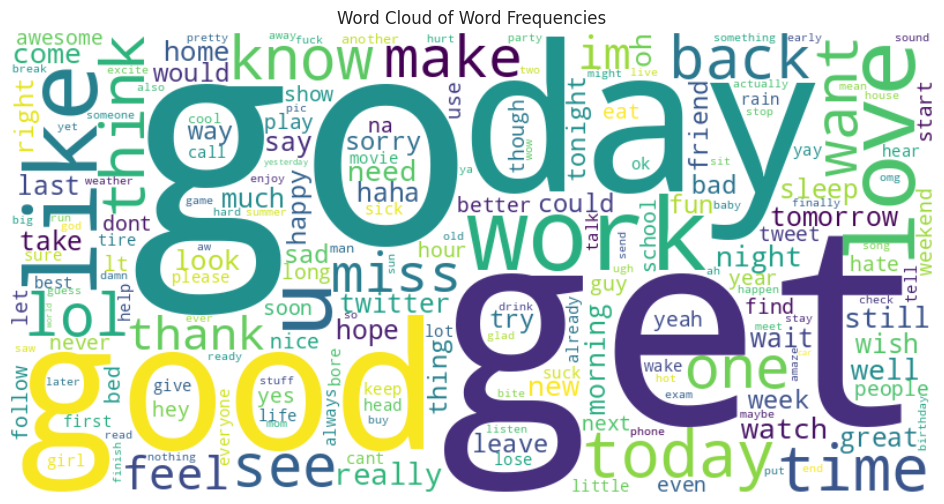

In [ ]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unique_word_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word Frequencies')
plt.show()

# **TRAIN** **LDA** **MODEL**

In [42]:
complete_twitter_cleaned

Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1592056  Just woke up. Having no school is the best fee...   
1592057  TheWDB.com - Very cool to hear old Walt interv...   
1592058  Are you ready for your MoJo Makeover? Ask me f...   
1592059  Happy 38th Birthday to my boo of alll time!!! ...   
1592060  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1592056                         wake school best feel ever         56   
1592057  thewdbcom cool hear old walt interview httpbli...         81   
1592058                     ready mojo makeover ask detail         57   
1592059    happy  birthday boo all time tupac amaru shakur         65   
1592060                               happy charitytuesday         62   

         clean_len  word_count_cleaned  
0             76.0                  11  
1             45.0                   9  
2             31.0                   6  
3             24.0                   3  
4             10.0                   2  
...            ...                 ...  
1592056       26.0                   5  
1592057       53.0                   7  
1592058       30.0                   5  
1592059       48.0                   8  
1592060       20.0                   2  

[1536431 rows x 5 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

#unigram_dictionary.filter_extremes(no_below=600, no_above=25_000)
#vectorizer = TfidfVectorizer(ngram_range = (1, 2), min_df=600, max_features=5000)

In [ ]:
vectorized_clean_text = vectorizer.fit_transform(complete_twitter_cleaned['clean_text'])

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

def convert_to_dataframe(matrix, vectorizer):
    if not isinstance(matrix, csr_matrix):
        matrix = csr_matrix(matrix)

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create DataFrame with sparse matrix and feature names as columns
    df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=feature_names)

    return df

vectorized_clean_text_df = convert_to_dataframe(vectorized_clean_text, vectorizer)

In [ ]:
complete_twitter_cleaned.shape[0], vectorized_clean_text_df.shape[0]
#1_536_431

(1536431, 1536431)

In [ ]:
vectorized_clean_text_df

aa  able  absolutely  abt   ac  accept  access  accident  account  \
0        0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
1        0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
2        0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
3        0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
4        0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
...      ...   ...         ...  ...  ...     ...     ...       ...      ...   
1536426  0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
1536427  0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
1536428  0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
1536429  0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   
1536430  0.0   0.0         0.0  0.0  0.0     0.0     0.0       0.0      0.0   

         ache  ...  you  young  youre  youtube  youu  yuck  yum  yummy  yup  \
0         0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
1         0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
2         0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
3         0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
4         0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
...       ...  ...  ...    ...    ...      ...   ...   ...  ...    ...  ...   
1536426   0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
1536427   0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
1536428   0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
1536429   0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   
1536430   0.0  ...  0.0    0.0    0.0      0.0   0.0   0.0  0.0    0.0  0.0   

         zoo  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
1536426  0.0  
1536427  0.0  
1536428  0.0  
1536429  0.0  
1536430  0.0  

[1536431 rows x 2429 columns]

In [ ]:
def fit_lda_model(vectorized_clean_text, batch_size=100, n_components=20, max_iter=100):
    total_samples = vectorized_clean_text.shape[0]
    n_batches = total_samples // batch_size

    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter)

    total_processed = 0  # Track total rows processed across batches

    for i in range(0, total_samples, batch_size):
        start = i
        end = min(i + batch_size, total_samples)
        batch_data = vectorized_clean_text[start:end]

        lda_model.partial_fit(batch_data)

        # Update the total number of rows processed
        total_processed += len(batch_data)

        # Check if we have processed at least 10,000 rows in total
        if total_processed >= 100000:
            print(f"✅ Processed {total_processed} rows")
            total_processed = 0  # Reset the counter

    print("LDA fitting completed.")
    return lda_model

In [ ]:
lda_model = fit_lda_model(vectorized_clean_text_df, batch_size=100, n_components=40, max_iter=100)

✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
LDA fitting completed.


## TOPICS FOR LDA MODEL

In [ ]:
import pickle

# Export Pipeline as pickle file
with open("/vectorizer_21_07_600_5K_02.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

# Export Pipeline as pickle file
with open("/lda_model_21_07_40_uni_bi_02.pkl", "wb") as file:
    pickle.dump(lda_model, file)

## **IF** **SYSTEM** **CRASHES**




In [ ]:
#IF SYSTEM CRASHES

#import from pickle file

import pickle

#first LDA model
with open('/vectorizer_21_07_600_5K_02.pkl', 'rb') as pickle_file:
    vectorizer = pickle.load(pickle_file)


vectorized_clean_text = vectorizer.transform(complete_twitter_cleaned['clean_text'])

import pandas as pd
from scipy.sparse import csr_matrix

def convert_to_dataframe(matrix, vectorizer):
    if not isinstance(matrix, csr_matrix):
        matrix = csr_matrix(matrix)

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create DataFrame with sparse matrix and feature names as columns
    df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=feature_names)

    return df

vectorized_clean_text_df = convert_to_dataframe(vectorized_clean_text, vectorizer)

with open('/lda_model_21_07_40_uni_bi_02.pkl', 'rb') as pickle_file:
    lda_model = pickle.load(pickle_file)

In [ ]:
# Print Top 10 Words for Each Topic

def topic_word(vectorizer, model, topic, topwords, with_weights = True):
    topwords_indexes = topic.argsort()[:-topwords - 1:-1]
    if with_weights == True:
        topwords = [(vectorizer.get_feature_names_out()[i], round(topic[i],2)) for i in topwords_indexes]
    if with_weights == False:
        topwords = [vectorizer.get_feature_names_out()[i] for i in topwords_indexes]
    return topwords


def print_topics(vectorizer, model, topwords):
    for idx, topic in enumerate(model.components_):
        print("-"*20)
        print("Topic %d:" % (idx))
        print(topic_word(vectorizer, model, topic, topwords))

print_topics(vectorizer, lda_model, topwords = 10)

--------------------
Topic 0:
[('better', 5384.67), ('tomorrow', 3929.19), ('god', 3097.84), ('blog', 2137.72), ('class', 1874.86), ('wonderful', 1767.13), ('turn', 1620.47), ('weather', 1553.06), ('definitely', 1462.86), ('worth', 1105.39)]
--------------------
Topic 1:
[('need', 5433.3), ('year', 2972.46), ('thats', 2842.36), ('old', 2603.81), ('sunday', 1969.03), ('walk', 1658.73), ('visit', 1534.05), ('hug', 1294.27), ('dress', 1105.37), ('sims', 939.93)]
--------------------
Topic 2:
[('back', 6786.33), ('bed', 4015.95), ('go', 2600.72), ('sit', 2114.07), ('go bed', 1586.4), ('drive', 1584.32), ('fuck', 1486.86), ('spend', 1459.76), ('shower', 1431.58), ('cause', 1383.96)]
--------------------
Topic 3:
[('guy', 5120.31), ('say', 4389.28), ('hi', 3842.06), ('could', 3813.49), ('saw', 2584.92), ('win', 2421.79), ('favorite', 1993.98), ('agree', 1488.78), ('proud', 1220.5), ('nite', 1189.67)]
--------------------
Topic 4:
[('thank', 20599.5), ('wait', 6997.76), ('yes', 6977.2), ('fol

In [ ]:
document_mixture = lda_model.transform(vectorized_clean_text)
document_mixture

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


array([[0.00567988, 0.00567988, 0.00567988, ..., 0.00567988, 0.00567988,
        0.00567988],
       [0.00703167, 0.00703167, 0.00703167, ..., 0.00703167, 0.00703167,
        0.00703167],
       [0.00789288, 0.00789288, 0.00789288, ..., 0.00789288, 0.00789288,
        0.00789288],
       ...,
       [0.01245048, 0.01245048, 0.01245048, ..., 0.01245048, 0.01245048,
        0.27737091],
       [0.00735065, 0.00735065, 0.00735065, ..., 0.00735065, 0.00735065,
        0.00735065],
       [0.0125    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ]])

In [ ]:
complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)

<ipython-input-75-2360e1a55545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)


In [ ]:
topic_word_mixture = [topic_word(vectorizer, lda_model, topic, topwords = 10, with_weights = False)
                      for topic in lda_model.components_]
topic_word_mixture

[['better',
  'tomorrow',
  'god',
  'blog',
  'class',
  'wonderful',
  'turn',
  'weather',
  'definitely',
  'worth'],
 ['need',
  'year',
  'thats',
  'old',
  'sunday',
  'walk',
  'visit',
  'hug',
  'dress',
  'sims'],
 ['back',
  'bed',
  'go',
  'sit',
  'go bed',
  'drive',
  'fuck',
  'spend',
  'shower',
  'cause'],
 ['guy',
  'say',
  'hi',
  'could',
  'saw',
  'win',
  'favorite',
  'agree',
  'proud',
  'nite'],
 ['thank',
  'wait',
  'yes',
  'follow',
  'bite',
  'update',
  'monday',
  'plan',
  'must',
  'good night'],
 ['happy',
  'hope',
  'yay',
  'use',
  'time',
  'amaze',
  'ok',
  'mean',
  'music',
  'also'],
 ['cool',
  'life',
  'summer',
  'two',
  'true',
  'dream',
  'kind',
  'damn',
  'yea',
  'set'],
 ['thing',
  'enjoy',
  'find',
  'day',
  'someone',
  'happen',
  'one',
  'green',
  'problem',
  'saturday'],
 ['people',
  'always',
  'buy',
  'funny',
  'drink',
  'rock',
  'stop',
  'btw',
  'share',
  'anything'],
 ['ready',
  'get',
  'already

In [ ]:
complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)

<ipython-input-77-2360e1a55545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)


In [ ]:
complete_twitter_cleaned['most_important_words'] = complete_twitter_cleaned['most_important_topic'].apply(lambda i: topic_word_mixture[i])

<ipython-input-78-51026e187ff2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_twitter_cleaned['most_important_words'] = complete_twitter_cleaned['most_important_topic'].apply(lambda i: topic_word_mixture[i])


In [ ]:
"""import pickle

# Export Pipeline as pickle file
with open("/vectorizer_21_07_600_5K.pkl", "wb") as file:
    pickle.dump(vectorizer, file)"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
"""import pickle

# Export Pipeline as pickle file
with open("/lda_model_21_07_20_uni_bi.pkl", "wb") as file:
    pickle.dump(lda_model, file)"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### CLEANING USER INPUT

In [ ]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import unicodedata
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocessing(sentence):

    #correct grammar
    blob = TextBlob(sentence)
    sentence = str(blob.correct())

    #remove white spaces
    sentence = sentence.strip()

    #lower the characters
    sentence = sentence.lower()

    #remove unique characters
    sentence = sentence.replace('½', 'half')

    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)

    # Normalize the text to remove accents and normalize forms
    sentence = unicodedata.normalize('NFD', sentence).encode('ascii', 'ignore').decode('utf-8')

    # Remove remaining non-ASCII characters
    sentence = re.sub(r'[^\x00-\x7F]+', ' ', sentence)

    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)

    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)

    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)

    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)

    #remove numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    #tokenize sentence
    tokens = word_tokenize(sentence)

    #remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    filtered_tokens = [''.join([c for c in word if c not in string.punctuation]) for word in filtered_tokens if word not in string.punctuation]

    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [pattern.sub(r"\1", word) for word in filtered_tokens]

    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]

    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#PRINT TOP 5 WORDS FROM MOST PROBABLE TOPIC

In [ ]:
def pre_process_user_input(sentence):

    #list to store top words
    top_words_list = []

    #clean user input with preprocessing steps
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input

    #OUTPUT : (0, 2318)	0.2888112425753094, e.g
    #LOGIC: word at index 2318 in the vocabulary has a weight of 0.2888 in the vectorized sentence.
    vectorized_input = vectorizer.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input

    #OUTPUT: [0.00685844 0.00685844 0.00685844 0.00685844 0.00685844 0.00685844], etc -
    #LOGIC: a total of 40 numbers due to 40 components - maps input to each topic, it all adds up to 1.
    topic_distribution = lda_model.transform(vectorized_input)

    # Find the index of the most probable topic

    #OUTPUT: 20
    #LOGIC: outputs an integer which relates to most probable topic (0 indexed)
    most_likely_topic_index = np.argmax(topic_distribution)

    # Get the top words for the most probable topic

    #OUTPUT: [2318  838 1323 1411  314]
    #LOGIC: Indices for the top words for the most probable topic - however, they refer to the indice in the vocabulary - unique words
    top_words_indices = lda_model.components_[most_likely_topic_index].argsort()[:-5 - 1:-1]

    #OUTPUT: ['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: Using the indices we map to each word in the vocab
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]

    #OUTPUT:['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: return 0 indexed top words
    top_words_list.append(top_words[0:])
    return top_words_list[0]

print(pre_process_user_input("I am super happy today"))

['best', 'pic', 'world', 'name', 'put']


In [ ]:
score = lda_model.score(vectorized_clean_text_df)

In [ ]:
score

-38693355.3703735

# SUGGESTING TOPICS BASED ON WEIGHT (USER INPUT)

In [ ]:
def pre_process_user_input(sentence, vectorizer, lda_model, n_top_words=5):
    # Clean the input
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input using TF-IDF
    vectorized_input = vectorizer.transform([processed_sentence])

    # Calculate the importance of each word in the input
    features = np.array(vectorizer.get_feature_names_out())
    sorting = np.argsort(vectorized_input.toarray()).flatten()[::-1]

    # Get the top n words based on their TF-IDF weights
    top_n_words = features[sorting][:n_top_words]

    return top_n_words

# Example usage:
sentence = 'This has been an amazing day!'

# Call the function
top_words = pre_process_user_input(sentence, vectorizer, lda_model)
print(top_words)

['amaze' 'day' 'zoo' 'get get' 'get lot']


## **INSPECT** **TOPICS**

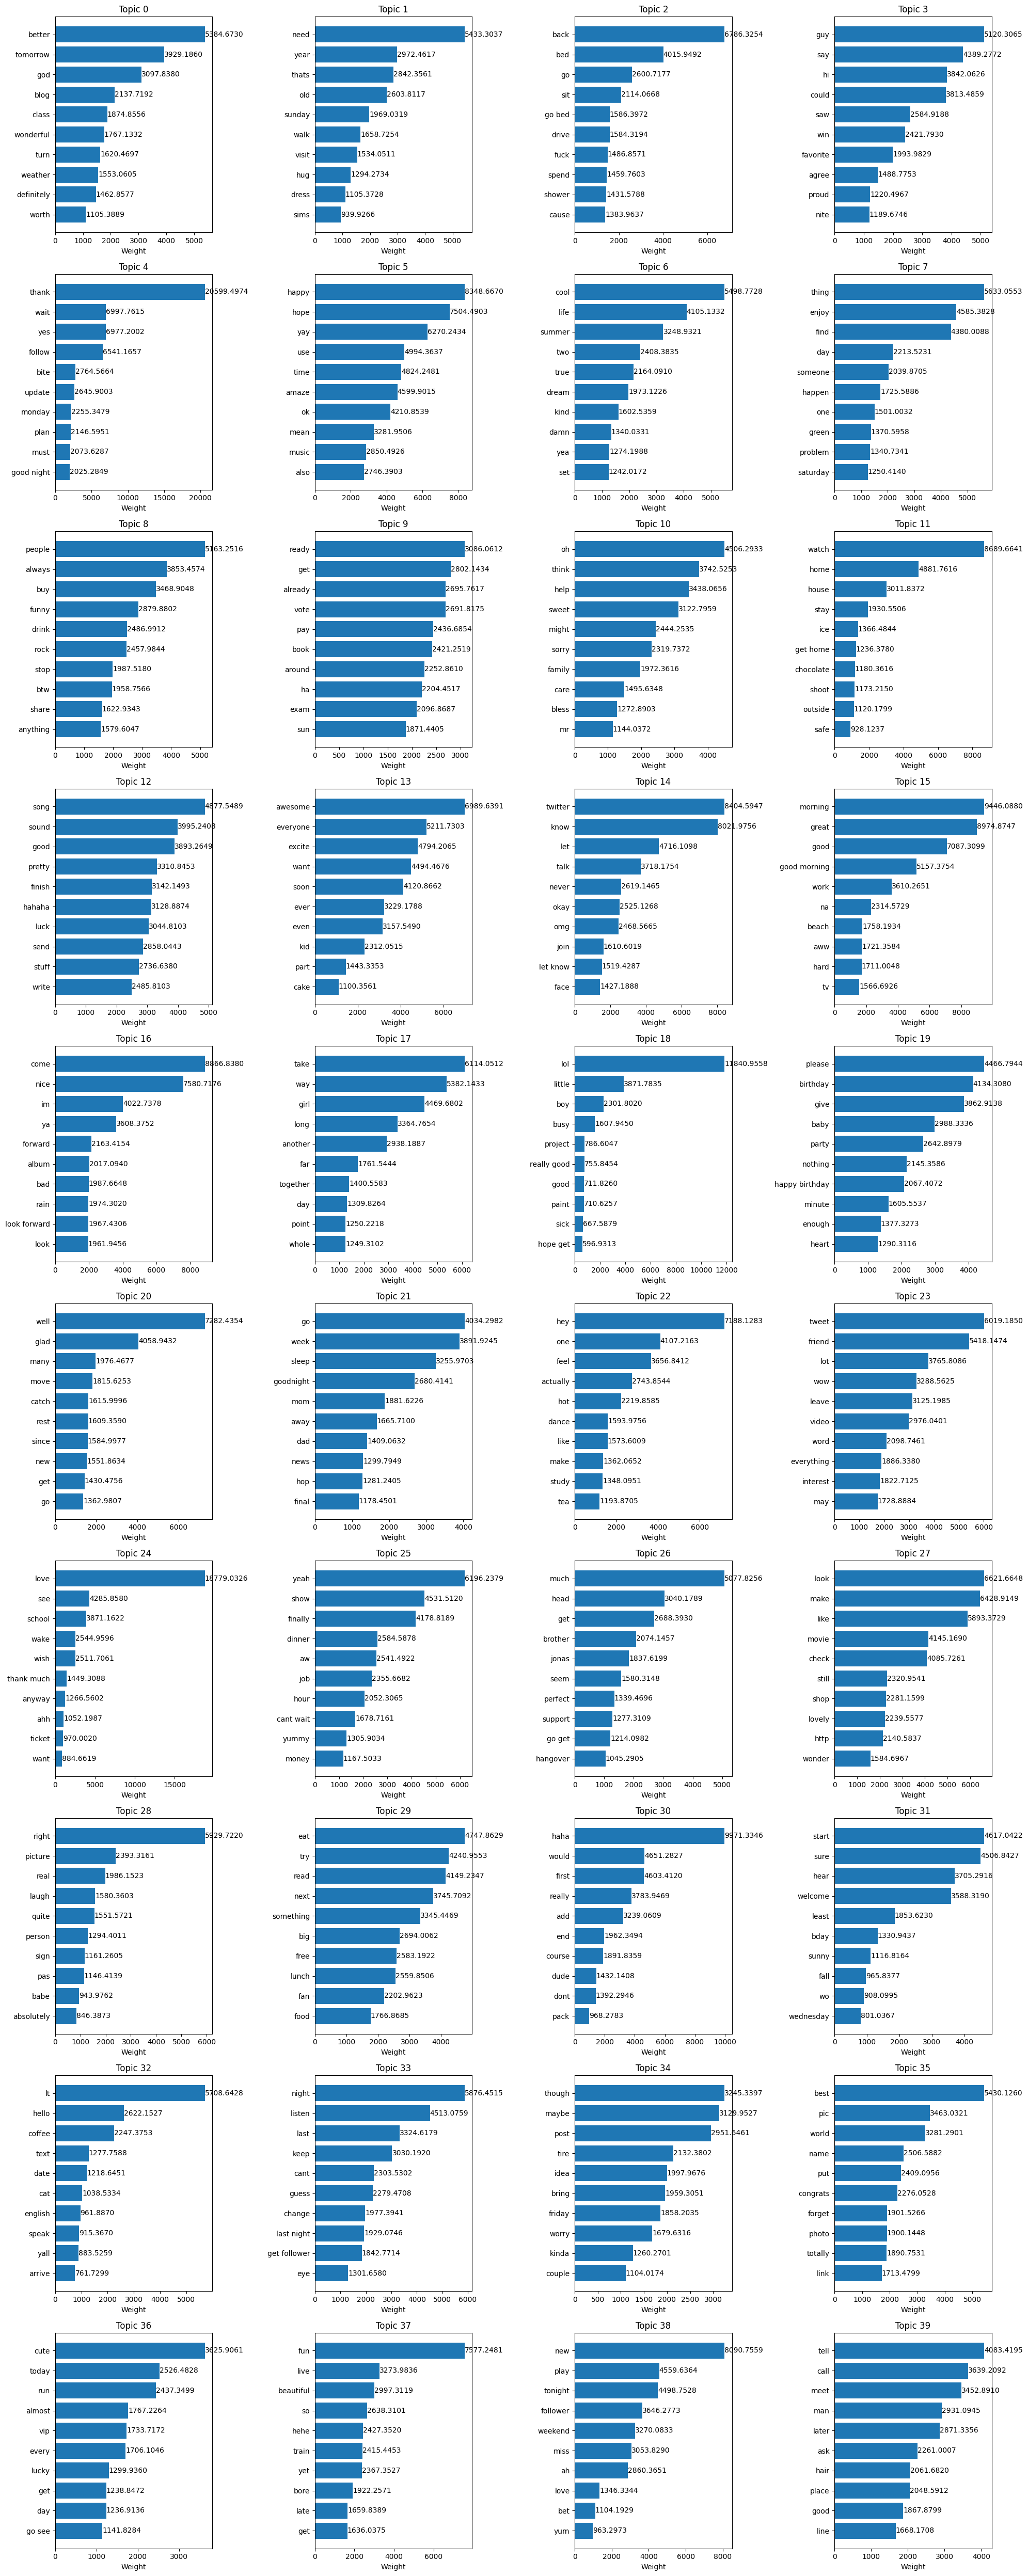

In [ ]:
import matplotlib.pyplot as plt

def plot_topic_words(model, vectorizer, num_words=10, num_columns=4):
    words = vectorizer.get_feature_names_out()
    num_topics = len(model.components_)
    num_rows = (num_topics + num_columns - 1) // num_columns  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[-num_words:][::-1]
        top_words = [words[i] for i in top_word_indices]
        top_weights = topic[top_word_indices]

        ax = axes[topic_idx]
        ax.barh(top_words, top_weights, align='center')
        ax.set_xlabel('Weight')
        ax.set_title(f'Topic {topic_idx}')
        ax.invert_yaxis()

        # Display the actual weight values on the x-axis
        for i, (word, weight) in enumerate(zip(top_words, top_weights)):
            ax.text(weight, i, f'{weight:.4f}', va='center', ha='left')

    # Turn off any unused subplots
    for ax in axes[num_topics:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage with a properly trained LDA model and vectorizer
plot_topic_words(lda_model, vectorizer)


In [ ]:
print(lda_model.components_.shape)

(40, 2429)


In [ ]:
model.save("/bertopic_model")

# FINAL LDA TESTING 40 COMPONENTS MODEL

## IMPORT DATA

In [27]:
#relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
complete_twitter_cleaned = pd.read_csv('../raw_data/complete_twitter_cleaned.csv', encoding='utf-8')

In [29]:
complete_twitter_cleaned

Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1592056  Just woke up. Having no school is the best fee...   
1592057  TheWDB.com - Very cool to hear old Walt interv...   
1592058  Are you ready for your MoJo Makeover? Ask me f...   
1592059  Happy 38th Birthday to my boo of alll time!!! ...   
1592060  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1592056                         wake school best feel ever         56   
1592057  thewdbcom cool hear old walt interview httpbli...         81   
1592058                     ready mojo makeover ask detail         57   
1592059    happy  birthday boo all time tupac amaru shakur         65   
1592060                               happy charitytuesday         62   

         clean_len  
0             76.0  
1             45.0  
2             31.0  
3             24.0  
4             10.0  
...            ...  
1592056       26.0  
1592057       53.0  
1592058       30.0  
1592059       48.0  
1592060       20.0  

[1592061 rows x 4 columns]

In [30]:
#should not have any null values 

complete_twitter_cleaned.isnull().sum()

Tweet         0
clean_text    0
tweet_len     0
clean_len     0
dtype: int64

In [31]:
#Create another column with lenght of sentences (words per sentence)

complete_twitter_cleaned['word_count_cleaned'] = complete_twitter_cleaned['clean_text'].apply(lambda x: len(x.split()))

In [32]:
complete_twitter_cleaned[complete_twitter_cleaned['word_count_cleaned'] < 2]

Tweet clean_text  tweet_len  \
7        @Tatiana_K nope they didn't have it       nope          36   
8                   @twittera que me muera ?       muera         25   
82                @markhardy1974 Me too  #itm        itm         27   
107              @Henkuyinepu it's overrated    overrate         28   
127                              I'm so cold        cold         12   
...                                       ...        ...        ...   
1591992              @AndrewDearling *yawns*        yawn         24   
1592011            finding out what this is.        find         26   
1592025              @OHTristaN it's sunoudy     sunoudy         24   
1592040             @shebbs123 i second that      second         25   
1592041                        In the garden      garden         14   

         clean_len  word_count_cleaned  
7              7.0                   1  
8              9.0                   1  
82             3.0                   1  
107           10.0                   1  
127            6.0                   1  
...            ...                 ...  
1591992        4.0                   1  
1592011        4.0                   1  
1592025        9.0                   1  
1592040        6.0                   1  
1592041        6.0                   1  

[55630 rows x 5 columns]

In [33]:
complete_twitter_cleaned = complete_twitter_cleaned[complete_twitter_cleaned['word_count_cleaned'] >= 2]

In [34]:
complete_twitter_cleaned

Tweet  \
0        is upset that he can't update his Facebook by ...   
1        @Kenichan I dived many times for the ball. Man...   
2          my whole body feels itchy and like its on fire    
3        @nationwideclass no, it's not behaving at all....   
4                            @Kwesidei not the whole crew    
...                                                    ...   
1592056  Just woke up. Having no school is the best fee...   
1592057  TheWDB.com - Very cool to hear old Walt interv...   
1592058  Are you ready for your MoJo Makeover? Ask me f...   
1592059  Happy 38th Birthday to my boo of alll time!!! ...   
1592060  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                clean_text  tweet_len  \
0        upset  update facebook texting  might cry resu...        111   
1            dive many time ball manage save rest go bound         89   
2                          whole body feel itchy like fire         47   
3                                         behave  mad  see        111   
4                                               whole crew         29   
...                                                    ...        ...   
1592056                         wake school best feel ever         56   
1592057  thewdbcom cool hear old walt interview httpbli...         81   
1592058                     ready mojo makeover ask detail         57   
1592059    happy  birthday boo all time tupac amaru shakur         65   
1592060                               happy charitytuesday         62   

         clean_len  word_count_cleaned  
0             76.0                  11  
1             45.0                   9  
2             31.0                   6  
3             24.0                   3  
4             10.0                   2  
...            ...                 ...  
1592056       26.0                   5  
1592057       53.0                   7  
1592058       30.0                   5  
1592059       48.0                   8  
1592060       20.0                   2  

[1536431 rows x 5 columns]

# FIRST LDA MODEL

## Train Again because versions are different

In [39]:
vectorizer_22_07_11_30 = TfidfVectorizer(ngram_range = (1, 2), min_df=600, max_features=5000)

In [40]:
vectorized_clean_text = vectorizer_22_07_11_30.fit_transform(complete_twitter_cleaned['clean_text'])

In [41]:
import pandas as pd
from scipy.sparse import csr_matrix

def convert_to_dataframe(matrix, vectorizer):
    if not isinstance(matrix, csr_matrix):
        matrix = csr_matrix(matrix)

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer_22_07_11_30.get_feature_names_out()

    # Create DataFrame with sparse matrix and feature names as columns
    df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=feature_names)

    return df

vectorized_clean_text_df = convert_to_dataframe(vectorized_clean_text, vectorizer_22_07_11_30)

In [42]:
complete_twitter_cleaned.shape[0], vectorized_clean_text_df.shape[0]

(1536431, 1536431)

In [43]:
vectorized_clean_text_df

aa  able  absolutely  abt  ac  accept  access  accident  account  \
0         0     0           0    0   0       0       0         0        0   
1         0     0           0    0   0       0       0         0        0   
2         0     0           0    0   0       0       0         0        0   
3         0     0           0    0   0       0       0         0        0   
4         0     0           0    0   0       0       0         0        0   
...      ..   ...         ...  ...  ..     ...     ...       ...      ...   
1536426   0     0           0    0   0       0       0         0        0   
1536427   0     0           0    0   0       0       0         0        0   
1536428   0     0           0    0   0       0       0         0        0   
1536429   0     0           0    0   0       0       0         0        0   
1536430   0     0           0    0   0       0       0         0        0   

         ache  ...  you  young  youre  youtube  youu  yuck  yum  yummy  yup  \
0           0  ...    0      0      0        0     0     0    0      0    0   
1           0  ...    0      0      0        0     0     0    0      0    0   
2           0  ...    0      0      0        0     0     0    0      0    0   
3           0  ...    0      0      0        0     0     0    0      0    0   
4           0  ...    0      0      0        0     0     0    0      0    0   
...       ...  ...  ...    ...    ...      ...   ...   ...  ...    ...  ...   
1536426     0  ...    0      0      0        0     0     0    0      0    0   
1536427     0  ...    0      0      0        0     0     0    0      0    0   
1536428     0  ...    0      0      0        0     0     0    0      0    0   
1536429     0  ...    0      0      0        0     0     0    0      0    0   
1536430     0  ...    0      0      0        0     0     0    0      0    0   

         zoo  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
1536426    0  
1536427    0  
1536428    0  
1536429    0  
1536430    0  

[1536431 rows x 2429 columns]

In [45]:
def fit_lda_model(vectorized_clean_text, batch_size=100, n_components=20, max_iter=100):
    total_samples = vectorized_clean_text.shape[0]
    n_batches = total_samples // batch_size

    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter)

    total_processed = 0  # Track total rows processed across batches

    for i in range(0, total_samples, batch_size):
        start = i
        end = min(i + batch_size, total_samples)
        batch_data = vectorized_clean_text[start:end]

        lda_model.partial_fit(batch_data)

        # Update the total number of rows processed
        total_processed += len(batch_data)

        # Check if we have processed at least 10,000 rows in total
        if total_processed >= 100000:
            print(f"✅ Processed {total_processed} rows")
            total_processed = 0  # Reset the counter

    print("LDA fitting completed.")
    return lda_model

In [46]:
lda_model_22_07_11_30 = fit_lda_model(vectorized_clean_text_df, batch_size=100, n_components=40, max_iter=100)

✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
✅ Processed 100000 rows
LDA fitting completed.


In [50]:
import pickle

# Export Pipeline as pickle file
with open("../model_small/lda_model_22_07_11_30.pkl", "wb") as file:
    pickle.dump(lda_model_22_07_11_30, file)

In [51]:
with open("../model_small/vectorizer_22_07_11_30.pkl", "wb") as file:
    pickle.dump(vectorizer_22_07_11_30, file)

# APPLYING LOGICS

In [52]:
vectorizer_22_07_11_30

TfidfVectorizer(max_features=5000, min_df=600, ngram_range=(1, 2))

In [53]:
lda_model_22_07_11_30

LatentDirichletAllocation(max_iter=100, n_components=40)

## PRINT TOP 10 WORDS FOR EACH TOPIC

In [54]:
def topic_word(vectorizer_22_07_11_30, lda_model_22_07_11_30, topic, topwords, with_weights = True):
    topwords_indexes = topic.argsort()[:-topwords - 1:-1]
    if with_weights == True:
        topwords = [(vectorizer_22_07_11_30.get_feature_names_out()[i], round(topic[i],2)) for i in topwords_indexes]
    if with_weights == False:
        topwords = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in topwords_indexes]
    return topwords


def print_topics(vectorizer_22_07_11_30, lda_model_22_07_11_30, topwords):
    for idx, topic in enumerate(lda_model_22_07_11_30.components_):
        print("-"*20)
        print("Topic %d:" % (idx))
        print(topic_word(vectorizer_22_07_11_30, lda_model_22_07_11_30, topic, topwords))

print_topics(vectorizer_22_07_11_30, lda_model_22_07_11_30, topwords = 10)

--------------------
Topic 0:
[('haha', 10611.09), ('girl', 4469.68), ('add', 3239.06), ('rock', 2457.98), ('guess', 2279.47), ('dont', 2093.3), ('dude', 1432.14), ('cd', 1391.53), ('tho', 1249.24), ('download', 1158.27)]
--------------------
Topic 1:
[('lol', 8727.28), ('ok', 4210.85), ('oh', 3891.42), ('like', 3592.63), ('thats', 2842.36), ('hot', 2219.86), ('exam', 2200.68), ('forward', 2163.42), ('look forward', 1967.43), ('look', 1932.58)]
--------------------
Topic 2:
[('know', 7891.19), ('back', 5576.18), ('glad', 4058.94), ('tomorrow', 3716.79), ('welcome', 3588.32), ('school', 3442.04), ('ready', 3303.56), ('fuck', 1486.86), ('day', 1367.08), ('get', 1345.42)]
--------------------
Topic 3:
[('help', 3438.07), ('something', 3345.45), ('write', 2485.81), ('early', 1714.64), ('link', 1713.48), ('line', 1668.17), ('email', 1609.71), ('set', 1242.02), ('appreciate', 1237.27), ('page', 1182.63)]
--------------------
Topic 4:
[('love', 15040.41), ('everyone', 5211.73), ('cute', 3625.

[('follow', 6541.17), ('work', 4940.4), ('amaze', 4599.9), ('lunch', 2559.85), ('good luck', 2352.76), ('good', 1760.12), ('hard', 1711.0), ('catch', 1616.0), ('tv', 1566.69), ('star', 1135.93)]
--------------------
Topic 37:
[('fun', 7577.25), ('song', 4877.55), ('eat', 4747.86), ('sound', 3995.24), ('live', 3273.98), ('pretty', 3210.05), ('finish', 3142.15), ('sweet', 3122.8), ('big', 2694.01), ('free', 2583.19)]
--------------------
Topic 38:
[('right', 5354.17), ('thing', 5265.75), ('enjoy', 4585.38), ('think', 3701.52), ('find', 3638.37), ('world', 3281.29), ('hahaha', 3128.89), ('cant', 2303.53), ('real', 1986.15), ('course', 1891.84)]
--------------------
Topic 39:
[('maybe', 3129.95), ('post', 2951.65), ('never', 2946.64), ('get', 2614.04), ('tire', 2132.38), ('worry', 1679.63), ('drive', 1584.32), ('couple', 1104.02), ('wed', 1079.74), ('hangover', 1045.29)]


In [55]:
document_mixture = lda_model_22_07_11_30.transform(vectorized_clean_text)
document_mixture

/Users/diogofreitas/.pyenv/versions/3.10.6/envs/song-sentiment-recommendation/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


array([[0.00567988, 0.00567988, 0.00567988, ..., 0.00567988, 0.00567988,
        0.00567988],
       [0.00703167, 0.00703167, 0.00703167, ..., 0.00703167, 0.00703167,
        0.00703167],
       [0.17557767, 0.00789288, 0.00789288, ..., 0.00789288, 0.00789288,
        0.00789288],
       ...,
       [0.01245048, 0.01245048, 0.24951069, ..., 0.01245048, 0.01245048,
        0.01245048],
       [0.00735065, 0.00735065, 0.00735065, ..., 0.00735065, 0.00735065,
        0.00735065],
       [0.0125    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ]])

### ADD ADDITIONAL COLUMNS TO DATAFRAME

In [56]:
#most important topic to column

complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)

/var/folders/xs/m1gb65yx3l77mfrv2427p6840000gn/T/ipykernel_77948/1771188580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_twitter_cleaned['most_important_topic'] = np.argmax(document_mixture, axis = 1)


In [58]:
topic_word_mixture = [topic_word(vectorizer_22_07_11_30, lda_model_22_07_11_30, topic, topwords = 10, with_weights = False)
                      for topic in lda_model_22_07_11_30.components_]
topic_word_mixture

[['haha',
  'girl',
  'add',
  'rock',
  'guess',
  'dont',
  'dude',
  'cd',
  'tho',
  'download'],
 ['lol',
  'ok',
  'oh',
  'like',
  'thats',
  'hot',
  'exam',
  'forward',
  'look forward',
  'look'],
 ['know',
  'back',
  'glad',
  'tomorrow',
  'welcome',
  'school',
  'ready',
  'fuck',
  'day',
  'get'],
 ['help',
  'something',
  'write',
  'early',
  'link',
  'line',
  'email',
  'set',
  'appreciate',
  'page'],
 ['love',
  'everyone',
  'cute',
  'summer',
  'run',
  'class',
  'hopefully',
  'definitely',
  'lucky',
  'gym'],
 ['morning',
  'good morning',
  'good',
  'sleep',
  'go',
  'goodnight',
  'today',
  'away',
  'afternoon',
  'go sleep'],
 ['hope',
  'tweet',
  'wow',
  'hour',
  'yesterday',
  'may',
  'anyone',
  'super',
  'reply',
  'whole'],
 ['twitter',
  'two',
  'phone',
  'true',
  'almost',
  'every',
  'support',
  'yum',
  'google',
  'warm'],
 ['play',
  'home',
  'ah',
  'yet',
  'face',
  'hand',
  'sunny',
  'bet',
  'cat',
  'officially'],


In [59]:
complete_twitter_cleaned['most_important_words'] = complete_twitter_cleaned['most_important_topic'].apply(lambda i: topic_word_mixture[i])

/var/folders/xs/m1gb65yx3l77mfrv2427p6840000gn/T/ipykernel_77948/2538616602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_twitter_cleaned['most_important_words'] = complete_twitter_cleaned['most_important_topic'].apply(lambda i: topic_word_mixture[i])


In [60]:
complete_twitter_cleaned.head()

Tweet  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                          clean_text  tweet_len  clean_len  \
0  upset  update facebook texting  might cry resu...        111       76.0   
1      dive many time ball manage save rest go bound         89       45.0   
2                    whole body feel itchy like fire         47       31.0   
3                                   behave  mad  see        111       24.0   
4                                         whole crew         29       10.0   

   word_count_cleaned  most_important_topic  \
0                  11                    25   
1                   9                    25   
2                   6                    22   
3                   3                    35   
4                   2                     6   

                                most_important_words  
0  [new, tonight, hear, follower, also, update, m...  
1  [new, tonight, hear, follower, also, update, m...  
2  [night, house, last, feel, so, stay, last nigh...  
3  [guy, see, buy, vote, dinner, favorite, vip, h...  
4  [hope, tweet, wow, hour, yesterday, may, anyon...

### CLEANING USER INPUT

In [61]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import unicodedata
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocessing(sentence):

    #correct grammar
    blob = TextBlob(sentence)
    sentence = str(blob.correct())

    #remove white spaces
    sentence = sentence.strip()

    #lower the characters
    sentence = sentence.lower()

    #remove unique characters
    sentence = sentence.replace('½', 'half')

    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)

    # Normalize the text to remove accents and normalize forms
    sentence = unicodedata.normalize('NFD', sentence).encode('ascii', 'ignore').decode('utf-8')

    # Remove remaining non-ASCII characters
    sentence = re.sub(r'[^\x00-\x7F]+', ' ', sentence)

    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)

    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)

    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)

    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)

    #remove numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    #tokenize sentence
    tokens = word_tokenize(sentence)

    #remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    filtered_tokens = [''.join([c for c in word if c not in string.punctuation]) for word in filtered_tokens if word not in string.punctuation]

    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [pattern.sub(r"\1", word) for word in filtered_tokens]

    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]

    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diogofreitas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diogofreitas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/diogofreitas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# PRINT TOP 5 WORDS FROM MOST PROBABLE TOPIC

In [62]:
vectorizer_22_07_11_30, lda_model_22_07_11_30

(TfidfVectorizer(max_features=5000, min_df=600, ngram_range=(1, 2)),
 LatentDirichletAllocation(max_iter=100, n_components=40))

In [102]:
def pre_process_user_input(sentence):

    #list to store top words
    top_words_list = []

    #clean user input with preprocessing steps
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input

    #OUTPUT : (0, 2318)	0.2888112425753094, e.g
    #LOGIC: word at index 2318 in the vocabulary has a weight of 0.2888 in the vectorized sentence.
    vectorized_input = vectorizer_22_07_11_30.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input

    #OUTPUT: [0.00685844 0.00685844 0.00685844 0.00685844 0.00685844 0.00685844], etc -
    #LOGIC: a total of 40 numbers due to 40 components - maps input to each topic, it all adds up to 1.
    topic_distribution = lda_model_22_07_11_30.transform(vectorized_input)

    # Find the index of the most probable topic

    #OUTPUT: 20
    #LOGIC: outputs an integer which relates to most probable topic (0 indexed)
    most_likely_topic_index = np.argmax(topic_distribution)

    # Get the top words for the most probable topic

    #OUTPUT: [2318  838 1323 1411  314]
    #LOGIC: Indices for the top words for the most probable topic - however, they refer to the indice in the vocabulary - unique words
    top_words_indices = lda_model_22_07_11_30.components_[most_likely_topic_index].argsort()[:-5 - 1:-1]

    #OUTPUT: ['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: Using the indices we map to each word in the vocab
    top_words = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in top_words_indices]

    #OUTPUT:['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: return 0 indexed top words
    top_words_list.append(top_words[0:])
    return top_words_list[0]

print(pre_process_user_input("I am excited about traveling around the world"))

['good', 'drink', 'good night', 'forget', 'perfect']


# RETURN TOP 10 WORDS FROM LEAST PROBABLE TOPIC

In [77]:
def pre_process_user_input(sentence):

    #list to store top words
    top_words_list = []

    #clean user input with preprocessing steps
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input

    #OUTPUT : (0, 2318)	0.2888112425753094, e.g
    #LOGIC: word at index 2318 in the vocabulary has a weight of 0.2888 in the vectorized sentence.
    vectorized_input = vectorizer_22_07_11_30.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input

    #OUTPUT: [0.00685844 0.00685844 0.00685844 0.00685844 0.00685844 0.00685844], etc -
    #LOGIC: a total of 40 numbers due to 40 components - maps input to each topic, it all adds up to 1.
    topic_distribution = lda_model_22_07_11_30.transform(vectorized_input)

    # Find the index of the most least topic

    #OUTPUT: 20
    #LOGIC: outputs an integer which relates to least probable topic (0 indexed)
    least_likely_topic_index = np.argmin(topic_distribution)

    # Get the top words for the least probable topic

    #OUTPUT: [2318  838 1323 1411  314]
    #LOGIC: Indices for the top words for the least probable topic - however, they refer to the indice in the vocabulary - unique words
    top_words_indices = lda_model_22_07_11_30.components_[least_likely_topic_index].argsort()[:-5 - 1:-1]

    #OUTPUT: ['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: Using the indices we map to each word in the vocab
    top_words = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in top_words_indices]

    #OUTPUT:['well', 'glad', 'many', 'move', 'catch']
    #LOGIC: return 0 indexed top words
    top_words_list.append(top_words[0:])
    return top_words_list[0]

print(pre_process_user_input("I am excited about traveling around the world"))

['haha', 'girl', 'add', 'rock', 'guess']


In [78]:
import numpy as np

topic_distribution = np.array([
    0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.16682036, 0.1596064, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.20689341, 0.00836861, 0.00836861, 0.00836861, 0.00836861,
    0.00836861, 0.00836861, 0.16540981, 0.00836861
])

print("Sum of topic distribution:", np.sum(topic_distribution))


Sum of topic distribution: 0.9999999399999999


# SUGGEST TOPICS BASED ON WEIGHT

In [66]:
vectorizer_22_07_11_30, lda_model_22_07_11_30

(TfidfVectorizer(max_features=5000, min_df=600, ngram_range=(1, 2)),
 LatentDirichletAllocation(max_iter=100, n_components=40))

In [101]:
def pre_process_user_input(sentence, vectorizer_22_07_11_30, n_top_words=5):
    
    # Clean the input
    processed_sentence = preprocessing(sentence)

    #OUTPUT: (0, 197)	0.3315879392486998 - 
    #LOGIC: index of where the word appears in the corpus and it's weight - if word is not on the corpus it get's ignored
    vectorized_input = vectorizer_22_07_11_30.transform([processed_sentence])

    # Calculate the importance of each word in the input
    
    #OUTPUT: ['aa' 'able' 'absolutely' ... 'yummy' 'yup' 'zoo'] 
    #LOGIC: all features detected from initial vectorizing
    features = np.array(vectorizer_22_07_11_30.get_feature_names_out())
    
    #OUTPUT:
    #LOGIC: 
    tfidf_scores = vectorized_input.toarray().flatten()
    
    # Get the indices of the top n words based on their TF-IDF weights
    top_n_indices = np.argsort(tfidf_scores)[::-1][:n_top_words]

    # Get the top n words
    top_n_words = features[top_n_indices]

    return top_n_words

# Example usage:
sentence = 'I am sad because i am going to the office!'

# Call the function
top_words = pre_process_user_input(sentence, vectorizer_22_07_11_30)
print(top_words)

['office' 'sad' 'go' 'get lot' 'get job']


## INSPECT TOPICS

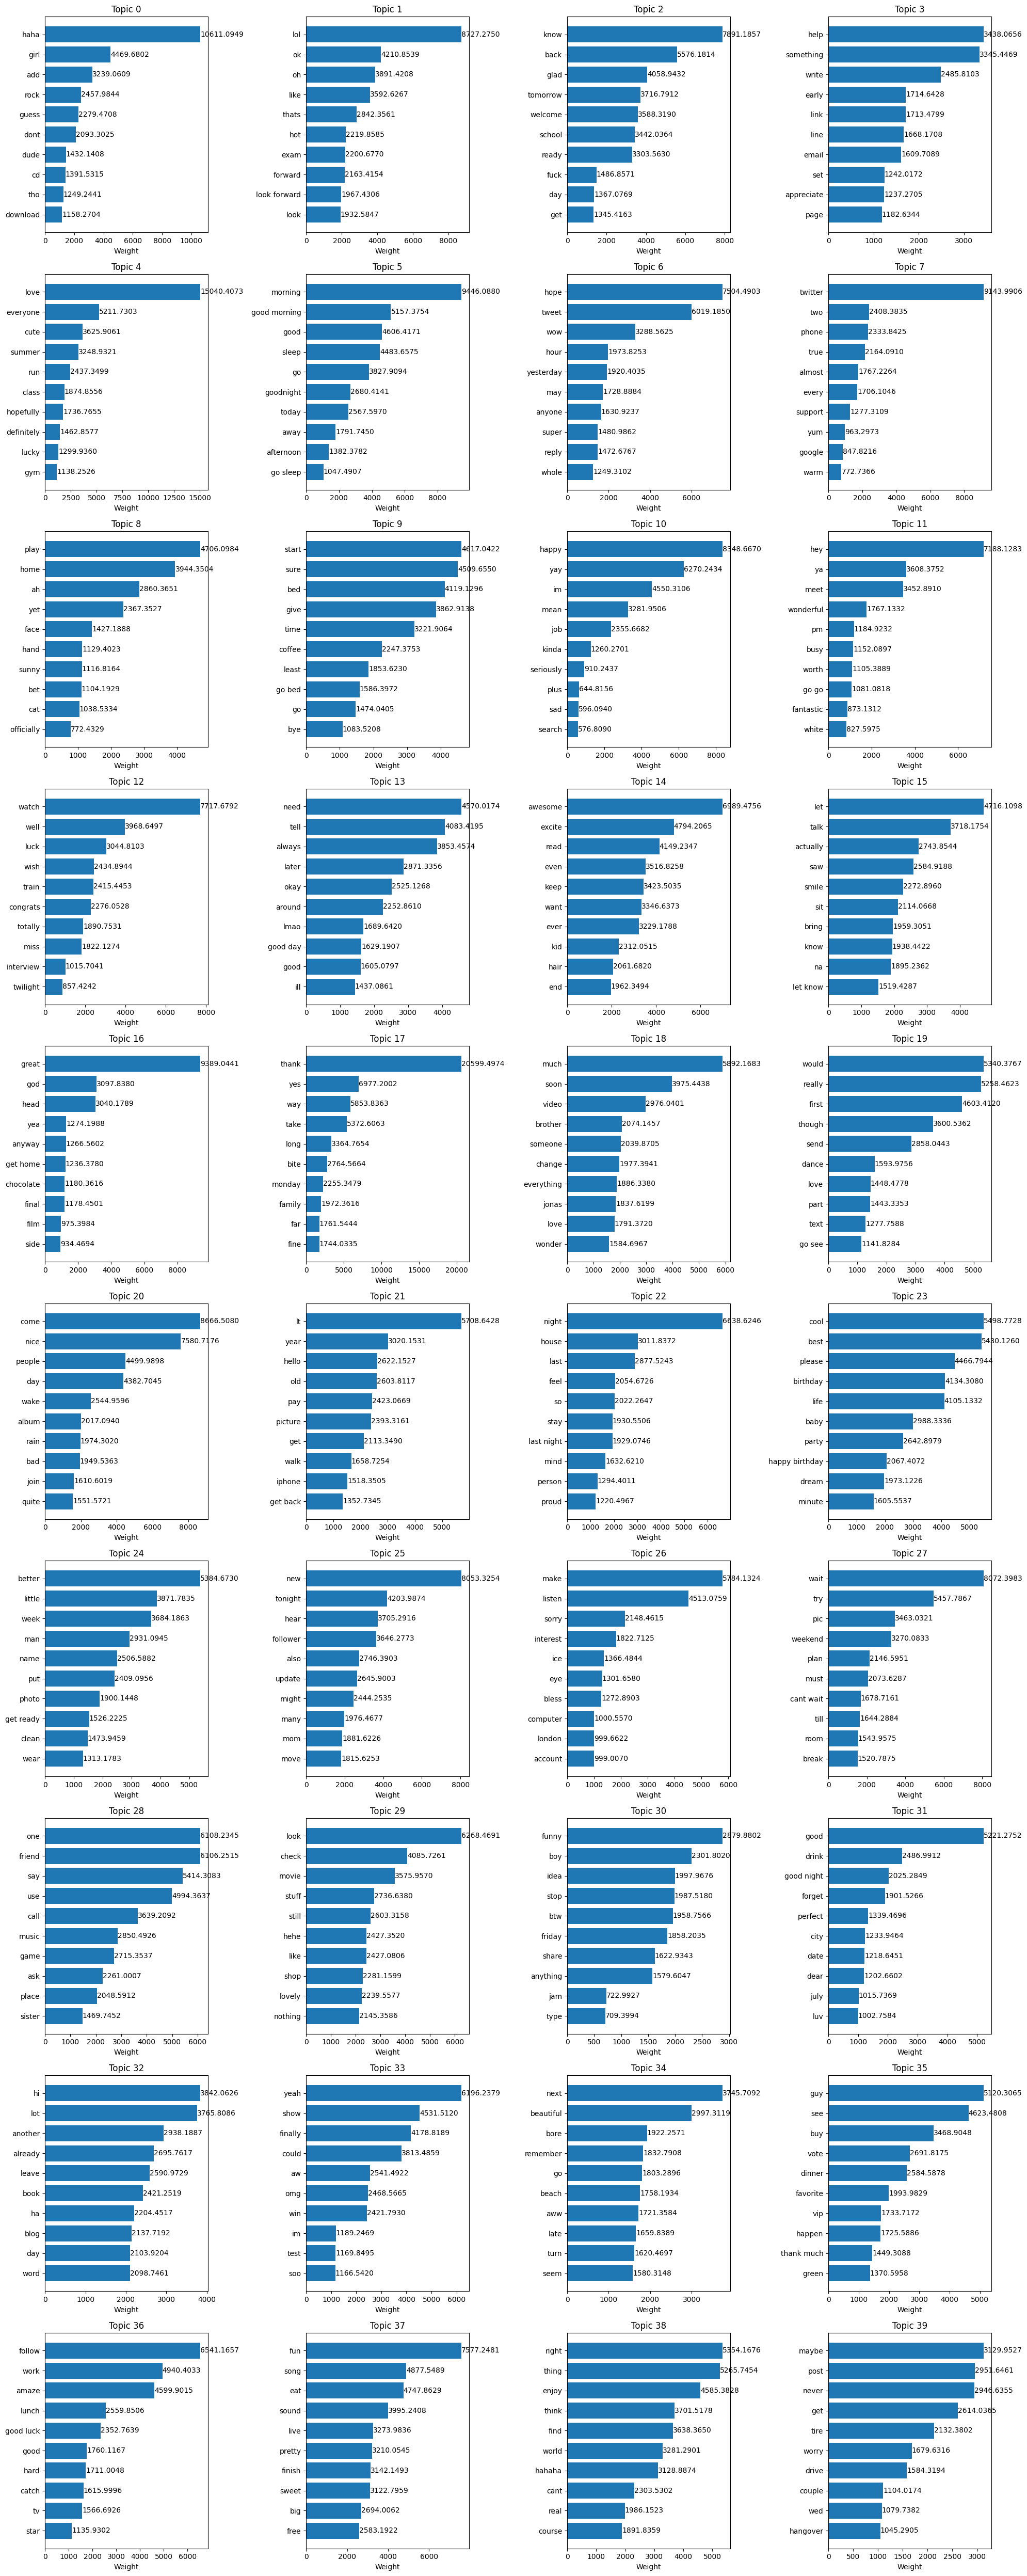

In [71]:
import matplotlib.pyplot as plt

def plot_topic_words(lda_model_22_07_11_30, vectorizer_22_07_11_30, num_words=10, num_columns=4):
    words = vectorizer_22_07_11_30.get_feature_names_out()
    num_topics = len(lda_model_22_07_11_30.components_)
    num_rows = (num_topics + num_columns - 1) // num_columns  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for topic_idx, topic in enumerate(lda_model_22_07_11_30.components_):
        top_word_indices = topic.argsort()[-num_words:][::-1]
        top_words = [words[i] for i in top_word_indices]
        top_weights = topic[top_word_indices]

        ax = axes[topic_idx]
        ax.barh(top_words, top_weights, align='center')
        ax.set_xlabel('Weight')
        ax.set_title(f'Topic {topic_idx}')
        ax.invert_yaxis()

        # Display the actual weight values on the x-axis
        for i, (word, weight) in enumerate(zip(top_words, top_weights)):
            ax.text(weight, i, f'{weight:.4f}', va='center', ha='left')

    # Turn off any unused subplots
    for ax in axes[num_topics:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage with a properly trained LDA model and vectorizer
plot_topic_words(lda_model_22_07_11_30, vectorizer_22_07_11_30)

In [486]:
import random

def pre_process_user_input(sentence, other_topic=False):
    
    
    if other_topic == False:
        #most probable topics
        top_word_ind = -1
        second_word_ind = -2
        reverse_order = True
    else:
        #least probable topics
        top_word_ind = 0
        second_word_ind = 1
        reverse_order = False       
    
    #list to store top words
    top_words_list = []

    #clean user input with preprocessing steps
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input

    #OUTPUT : (0, 2318)	0.2888112425753094, e.g
    #LOGIC: word at index 2318 in the vocabulary has a weight of 0.2888 in the vectorized sentence.
    vectorized_input = vectorizer_22_07_11_30.transform([processed_sentence])

    #OUTPUT: [0.00685844 0.00685844 0.00685844 0.00685844 0.00685844 0.00685844], etc -
    #LOGIC: a total of 40 numbers due to 40 components - maps input to each topic, it all adds up to 1.
    topic_distribution = lda_model_22_07_11_30.transform(vectorized_input)

    #OUTPUT: 20
    #LOGIC: outputs an integer which relates to most probable topic (0 indexed)
    #top_two_topics_indices = topic_distribution[0].argsort()[-2:][::-1]
        
    #most probable topic
    top_topics_indice = topic_distribution[0].argsort()[top_word_ind] #[-1]
    
    #second most probable topic
    top_two_topics_indice = topic_distribution[0].argsort()[second_word_ind] #[-2]

    # Get the top words for the most probable topic
    
    #OUTPUT: [2318  838 1323 1411  314]
    #LOGIC: Indices for the top words for the most probable topic - however, they refer to the indice in the vocabulary - unique words
    
    
    #GET WORDS FOR TOPICS
    #top words for most probable topic
    top_words_indices = lda_model_22_07_11_30.components_[top_topics_indice].argsort()[:-30 - 1:-1]
    
    #top words for second most probable
    second_top_words_indices = lda_model_22_07_11_30.components_[top_two_topics_indice].argsort()[:-30 - 1:-1]
    
    #GET WORDS
    
    words_with_weights = []
    
    #TOP TOPICS WORDS
    top_topic_words = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in top_words_indices]
    second_top_topic_words = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in second_top_words_indices]
    
    #GET WEIGHTS
    
    #top topic weights
    top_topic_weights = [lda_model_22_07_11_30.components_[top_topics_indice][i] for i in top_words_indices]
    #second topic weights
    second_top_topic_weights = [lda_model_22_07_11_30.components_[top_two_topics_indice][i] for i in second_top_words_indices]
    
    #TOPICS WITH WEIGHTS
    
    #first topic words and weights
    top_topic_words_with_weights = list(zip(top_topic_words, top_topic_weights))
    #first topic words and weights
    second_top_topic_words_with_weights = list(zip(second_top_topic_words, second_top_topic_weights))


    #Concatenate both lists
    
    topics_words_weights = top_topic_words_with_weights + second_top_topic_words_with_weights
    
    #get random 10
    
    random_10_words_weights = set(random.choices(topics_words_weights, k=10))
    sorted_random_10_words_weights = sorted(random_10_words_weights, key=lambda x: x[1], reverse=reverse_order)
    
    #get 5 from 10
    
    output_topics = sorted_random_10_words_weights[:5]
    
    #print out five words
    
    output_5 = [x[0] for x in output_topics]

    return output_5

print(pre_process_user_input("I am excited because my model is working fine now", False))

['take', 'game', 'open', 'see', 'list']


In [188]:
def topic_word(vectorizer_22_07_11_30, lda_model_22_07_11_30, topic, topwords, with_weights = True):
    topwords_indexes = topic.argsort()[:-topwords - 1:-1]
    if with_weights == True:
        topwords = [(vectorizer_22_07_11_30.get_feature_names_out()[i], round(topic[i],2)) for i in topwords_indexes]
    if with_weights == False:
        topwords = [vectorizer_22_07_11_30.get_feature_names_out()[i] for i in topwords_indexes]
    return topwords


def print_topics(vectorizer_22_07_11_30, lda_model_22_07_11_30, topwords):
    for idx, topic in enumerate(lda_model_22_07_11_30.components_):
        print("-"*20)
        print("Topic %d:" % (idx))
        print(topic_word(vectorizer_22_07_11_30, lda_model_22_07_11_30, topic, topwords))

print_topics(vectorizer_22_07_11_30, lda_model_22_07_11_30, topwords = 10)

--------------------
Topic 0:
[('haha', 10611.09), ('girl', 4469.68), ('add', 3239.06), ('rock', 2457.98), ('guess', 2279.47), ('dont', 2093.3), ('dude', 1432.14), ('cd', 1391.53), ('tho', 1249.24), ('download', 1158.27)]
--------------------
Topic 1:
[('lol', 8727.28), ('ok', 4210.85), ('oh', 3891.42), ('like', 3592.63), ('thats', 2842.36), ('hot', 2219.86), ('exam', 2200.68), ('forward', 2163.42), ('look forward', 1967.43), ('look', 1932.58)]
--------------------
Topic 2:
[('know', 7891.19), ('back', 5576.18), ('glad', 4058.94), ('tomorrow', 3716.79), ('welcome', 3588.32), ('school', 3442.04), ('ready', 3303.56), ('fuck', 1486.86), ('day', 1367.08), ('get', 1345.42)]
--------------------
Topic 3:
[('help', 3438.07), ('something', 3345.45), ('write', 2485.81), ('early', 1714.64), ('link', 1713.48), ('line', 1668.17), ('email', 1609.71), ('set', 1242.02), ('appreciate', 1237.27), ('page', 1182.63)]
--------------------
Topic 4:
[('love', 15040.41), ('everyone', 5211.73), ('cute', 3625.